In [1]:
BiocManager::install('ropls')
#install.packages('fastDummies')

Bioconductor version 3.10 (BiocManager 1.30.10), R 3.6.3 (2020-02-29)

Installing package(s) 'ropls'

also installing the dependencies ‘GenomeInfoDbData’, ‘zlibbioc’, ‘BiocParallel’, ‘GenomeInfoDb’, ‘XVector’, ‘DelayedArray’, ‘calibrate’, ‘GenomicRanges’, ‘IRanges’, ‘S4Vectors’, ‘SummarizedExperiment’, ‘qqman’, ‘Biobase’, ‘MultiDataSet’


Old packages: 'actuar', 'ade4', 'afex', 'agricolae', 'AICcmodavg', 'AID',
  'akima', 'ald', 'AmesHousing', 'anomalize', 'anytime', 'ape', 'aricode',
  'arm', 'arrangements', 'arrow', 'arsenal', 'arules', 'arulesViz', 'assertr',
  'astsa', 'autothresholdr', 'aweek', 'babynames', 'Ball', 'bartCause',
  'BatchGetSymbols', 'bayesplot', 'bayestestR', 'BDgraph', 'beeswarm',
  'benchmarkme', 'bestNormalize', 'betareg', 'bibtex', 'biglm', 'bigrquery',
  'billboarder', 'binman', 'BiocManager', 'BioStatR', 'bipartite', 'bit',
  'bit64', 'bitops', 'blockmodels', 'BMA', 'bnlearn', 'bookdown', 'Boom',
  'BoomSpikeSlab', 'boot', 'bootnet', 'Boruta', 'breakDown', 'b

In [2]:
#install.packages('caret')
library(repr)
options(repr.plot.width=8, repr.plot.height = 8)
library(ropls)
library(heatmaply)
library(pls)
library(ggplot2)
library(pROC)
library(dummies)
library(tidyr)
library(dplyr)
library(stringr)
library(gridExtra)
library(dendextend)
library(grid)
library(readxl)
library(plotly)
#library(ggstatsplot)
library(fastDummies)
options(warn=-1)

Loading required package: Biobase

Loading required package: BiocGenerics

Loading required package: parallel


Attaching package: ‘BiocGenerics’


The following objects are masked from ‘package:parallel’:

    clusterApply, clusterApplyLB, clusterCall, clusterEvalQ,
    clusterExport, clusterMap, parApply, parCapply, parLapply,
    parLapplyLB, parRapply, parSapply, parSapplyLB


The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs


The following objects are masked from ‘package:base’:

    anyDuplicated, append, as.data.frame, basename, cbind, colnames,
    dirname, do.call, duplicated, eval, evalq, Filter, Find, get, grep,
    grepl, intersect, is.unsorted, lapply, Map, mapply, match, mget,
    order, paste, pmax, pmax.int, pmin, pmin.int, Position, rank,
    rbind, Reduce, rownames, sapply, setdiff, sort, table, tapply,
    union, unique, unsplit, which, which.max, which.min


Welcome to Bioconductor

    Vignettes contain introductory material; vie

In [3]:
df <- read_excel('../input/lung-cancer-proyecto-iii/Base_inmunosenescencia_v11.xlsx', sheet = 1)
head(df)

New names:
* Estudios -> Estudios...11
* Est_civil -> Est_civil...12
* Comp_hogar -> Comp_hogar...13
* MOSs -> MOSs...14
* Ansiedad -> Ansiedad...15
* ...



Num_pac,Sexo,Fecha_nac,Fecha_dx,Edad_dx,ECOG,Peso,Talla,IMC,PC_perd_peso,⋯,Dim.10,Dim.11,Dim.12,Dim.13,Dim.14,Dim.15,Dim.16,Dim.17,Dim.18,Dim.19
<dbl>,<dbl>,<dttm>,<dttm>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
4,2,1962-08-10,2018-01-30,55,3,64.5,1.80,19.90741,0.0720,⋯,2.61077345,1.2287489,0.1163991,-0.0212454,-1.2832440,-1.20188754,1.4860039,-0.4624521,-0.3303524,1.0520965
5,2,1959-03-21,2018-02-07,58,1,48.0,1.67,17.21109,0.0780,⋯,1.66793177,0.3877313,0.9584045,-0.2031128,0.8928070,-0.02266133,0.4962536,-0.1398236,-1.1869650,-0.5789949
6,2,1952-11-19,2018-03-16,65,1,83.0,1.78,26.19619,0.1075,⋯,-0.03097537,0.8582613,-0.2435692,-0.1616759,-0.6063758,1.75521286,0.0798942,-0.2640936,-0.5993472,-1.3656815
7,2,1941-05-19,2018-03-28,76,2,66.5,1.65,24.42608,NA,⋯,2.29822716,0.9185976,-0.9589792,0.9913932,-0.7784235,0.93583467,-0.2503857,-0.0956911,1.3625944,-0.9496518
9,2,1954-04-05,2018-04-18,64,0,80.0,1.65,29.38476,0.0000,⋯,-0.89840835,-0.2807580,-0.4253535,0.7945433,-0.4825517,0.64432212,0.4013179,0.4325078,-0.9632974,-0.8208347
10,2,1959-09-20,2018-04-19,58,2,105.0,1.70,36.33218,0.0200,⋯,-0.49455014,-0.7674975,0.4472938,1.5642471,0.7022453,-0.52705288,0.3339309,0.2680528,-0.6028941,-0.5223940


In [4]:
vbles_count <- c( "Neutrofilos", "Linf_tot", "Plaquetas", "LinfT_cel", "CD4_cel", "CD8_cel", "CD4:CD8", "LinfB_cel", "LinfNK_cel", 
  "HLADR+Lin_C_Leuc", "mDC_C_Leuc", "pDC_C_Leuc", "CD4_Central_Mem_C_Linf", "CD4_Effector_Mem_C_Linf", "CD4_Naïve_C_Linf", "CD4_TEMRA_C_Linf", 
  "CD8_Central_Mem_C_Linf", "CD8_Effector_Mem_C_Linf", "CD8_Naïve_C_Linf", "CD8_TEMRA_C_Linf", "mDC_CD16_C_mDC", "mDC_CD1c_C_mDC", 
  "mDC_Clec9A_C_mDC", "CD27-CD57+CD3+_C_Linf", "CD27-CD57+CD4+_C_CD3", "CD27-CD57+CD8+_C_CD3", "CD45RA+CCR7+CD3+_C_Linf", "CD8+_term_efect_C_CD3", 
  "CD8_exhausted_C_CD3", "CD4_TCR_ab+_C_CD3", "CD4+_C_Linf", "CD8+_TCR_ab+_C_CD3", "CD8+_C_Linf", "CD8+CD4+_C_Linf", "CD8-CD4-_C_Linf", "HLADR+CD3+_C_Linf", 
  "TCR_ab+_C_Linf", "TCR_gd+_C_Linf", "gd_VD1+_C_CD3", "gd_VD1+VD2+_C_CD3", "gd_VD1-VD2-_C_CD3", "gd_VD2+_C_CD3", "CD25+CD4+_C_Linf" )
X <- df[,vbles_count]
Y <-  df$Clusters

In [11]:
Y[which(Y == 0)] <- 0
Y[which(Y == 1)] <- 1
Y[which(Y == 2)] <- 2
Y[which(Y == 3)] <- 3
Y[which(Y == 4)] <- 4
Y[which(Y == 5)] <- 5
Y[which(Y == 6)] <- 4
Y[which(Y == 7)] <- 6
Y[which(Y == 8)] <- 5
Y[which(Y == 9)] <- 7
Y[which(Y == 10)] <- 8

In [13]:
kappa_value <- 0
n_c <- 1
plsda_vbles <- NULL 
kappa_values <- c()
components <- c()
while(TRUE){
    mypls = opls(x = X, predI = n_c, crossvalI=nrow(X), y = as.factor(Y), scaleC = "standard", fig.pdfC = FALSE, info.txtC = 'none')
    ajuste = predict(mypls, X)
    confu = table('real' = as.factor(Y), 'predicho' = ajuste)
    diagonal.counts <- diag(confu)
    N <- sum(confu)
    row.marginal.props <- rowSums(confu)/N
    col.marginal.props <- colSums(confu)/N
    Po <- sum(diagonal.counts)/N
    Pe <- sum(row.marginal.props*col.marginal.props)
    kappa <- (Po - Pe)/(1 - Pe)
    print(paste('[INFO] Kappa: ', kappa, 'with ', n_c, 'components')) 
    if (kappa < kappa_value){
        break
    }
    else{
        kappa_value <- kappa
        n_c <- n_c + 1
        kappa_values <- c(kappa_values, kappa)
        components <- c(components, n_c)
    }
}

[1] "[INFO] Kappa:  0.214967598076789 with  1 components"
[1] "[INFO] Kappa:  0.295261742189116 with  2 components"
[1] "[INFO] Kappa:  0.491452700401825 with  3 components"
[1] "[INFO] Kappa:  0.530402434900237 with  4 components"
[1] "[INFO] Kappa:  0.655332928556972 with  5 components"
[1] "[INFO] Kappa:  0.700450601923465 with  6 components"
[1] "[INFO] Kappa:  0.73538917317533 with  7 components"
[1] "[INFO] Kappa:  0.806862350891302 with  8 components"
[1] "[INFO] Kappa:  0.815752461322082 with  9 components"
[1] "[INFO] Kappa:  0.859442060085837 with  10 components"
[1] "[INFO] Kappa:  0.850717254323636 with  11 components"


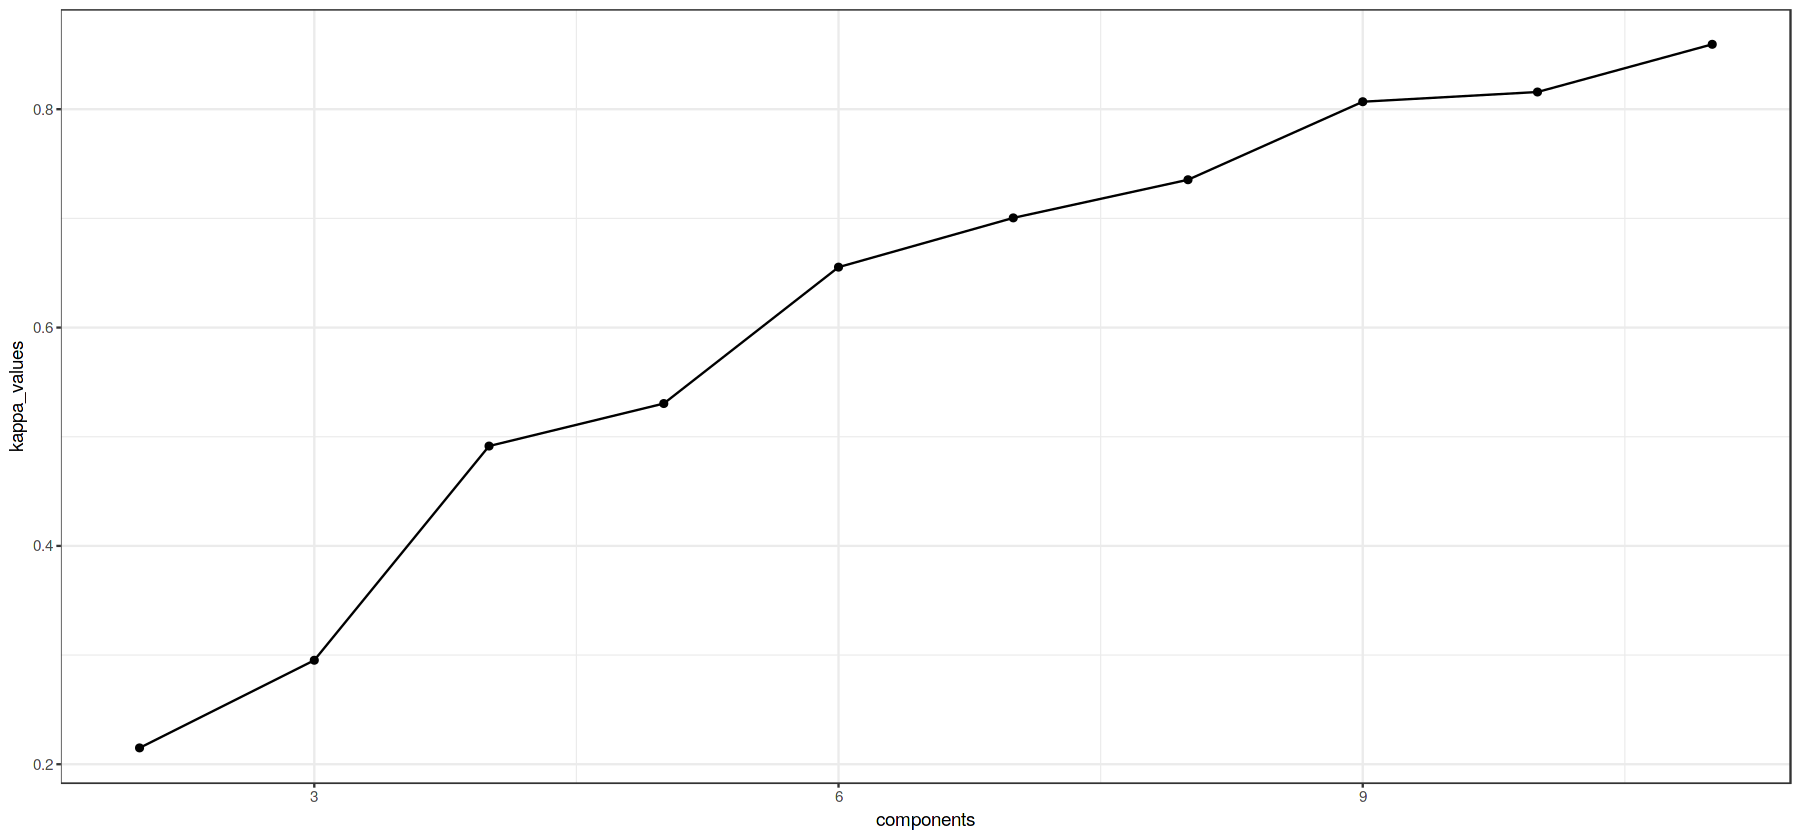

In [14]:
options(repr.plot.width=15, repr.plot.height=7)
kppa_components <- cbind(kappa_values, components)
kppa_components <- as.data.frame(kppa_components)
ggplot(kppa_components, aes(x = components, y = kappa_values)) + geom_line() + geom_point() + theme_bw()

In [15]:
mypls = opls(x = X, predI = 9, crossvalI=nrow(X), y = as.factor(Y), scaleC = "standard", fig.pdfC = FALSE)

PLS-DA
131 samples x 43 variables and 1 response
standard scaling of predictors and response(s)
      R2X(cum) R2Y(cum) Q2(cum) RMSEE pre ort pR2Y  pQ2
Total     0.77    0.476   0.257  0.24   9   0 0.05 0.05


In [16]:
mypls1 = opls(x = X, y = as.factor(Y), predI = 1, scaleC = "standard", fig.pdfC = FALSE, info.txtC = 'none')
mypls2 = opls(x = X, y = as.factor(Y), predI = 2, scaleC = "standard", fig.pdfC = FALSE, info.txtC = 'none')

Ypred1 = mypls1@scoreMN %*% t(mypls1@loadingMN)
Ypred2 = mypls2@scoreMN %*% t(mypls2@loadingMN)
R2X = matrix(NA, nrow = 2, ncol = ncol(X))
SCT = colSums(scale(X)^2)
SCE1 = colSums(Ypred1^2)
SCE2 = colSums(Ypred2^2)

R2X[1,] = round(100*SCE1/SCT, 2)
R2X[2,] = round(100*SCE2/SCT, 2) - R2X[1,]
colnames(R2X) <- colnames(X)
rownames(R2X) <- c('Comp 1', 'Comp 2')
R2X

,Neutrofilos,Linf_tot,Plaquetas,LinfT_cel,CD4_cel,CD8_cel,CD4:CD8,LinfB_cel,LinfNK_cel,HLADR+Lin_C_Leuc,⋯,CD8+CD4+_C_Linf,CD8-CD4-_C_Linf,HLADR+CD3+_C_Linf,TCR_ab+_C_Linf,TCR_gd+_C_Linf,gd_VD1+_C_CD3,gd_VD1+VD2+_C_CD3,gd_VD1-VD2-_C_CD3,gd_VD2+_C_CD3,CD25+CD4+_C_Linf
Comp 1,1.71,82.10,0.03,88.98,45.51,74.65,5.19,25.15,4.05,6.95,⋯,16.56,29.97,67.51,85.40,22.35,7.57,1.62,2.30,12.29,16.31
Comp 2,3.60,6.58,0.07,2.05,33.85,16.25,23.28,10.55,15.79,27.01,⋯,0.04,2.50,7.85,4.08,0.30,0.50,1.28,0.03,1.04,29.66


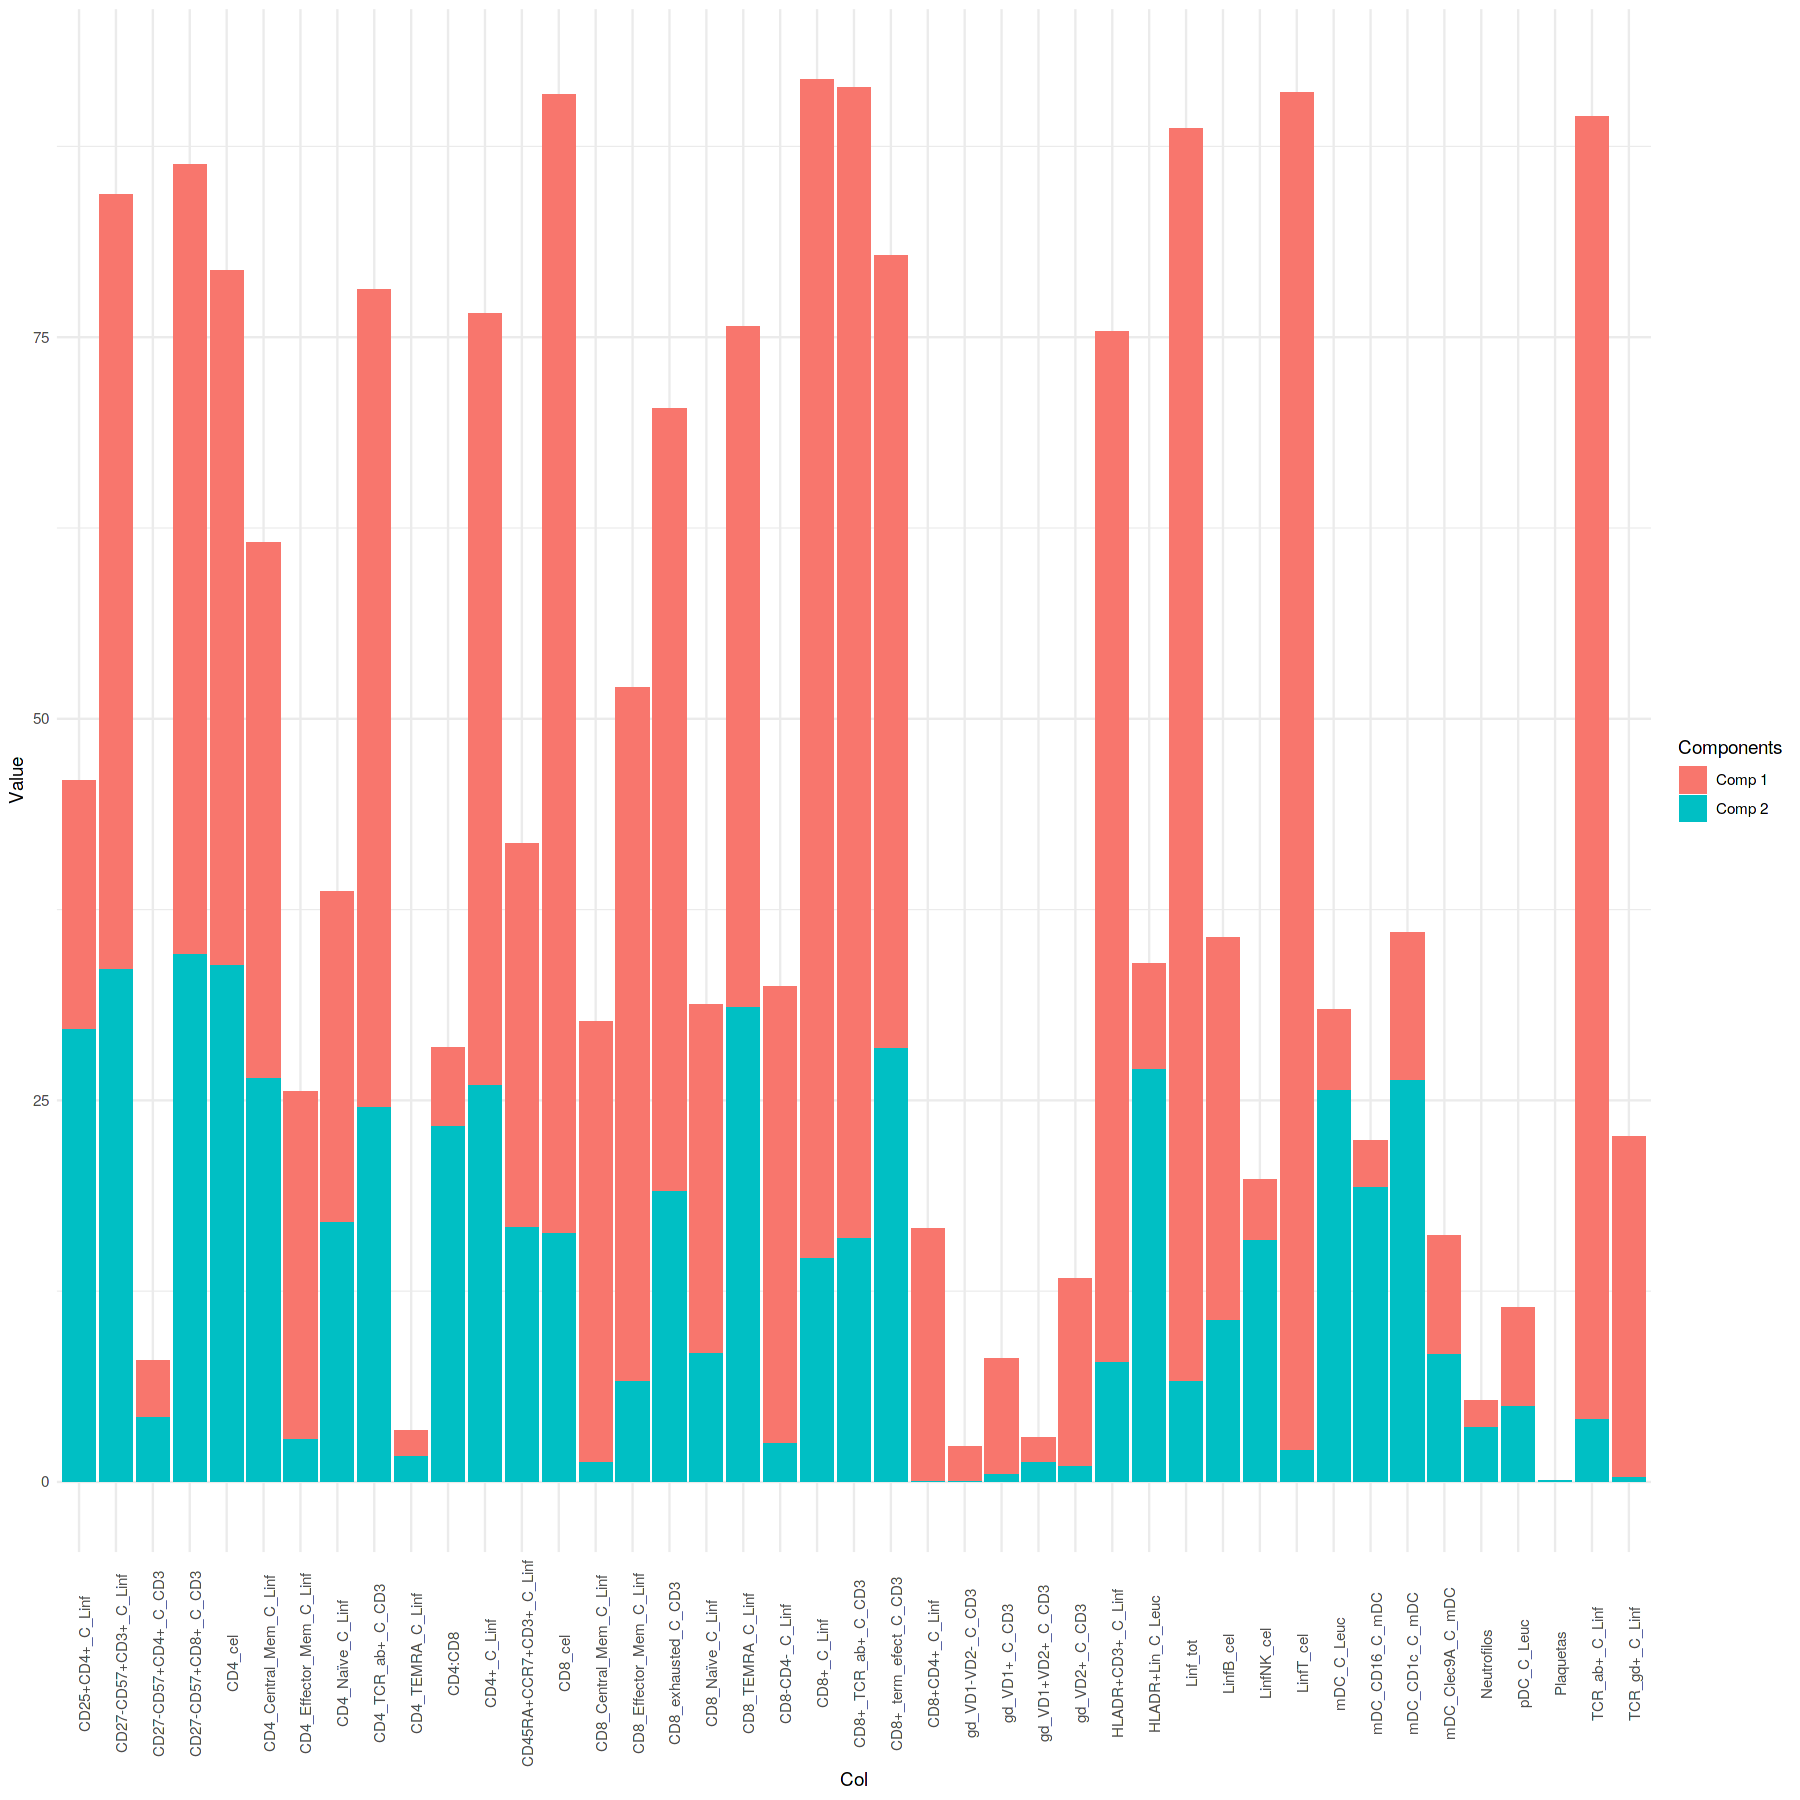

In [17]:
options(repr.plot.width=15, repr.plot.height=15)

aux <- as.data.frame(t(R2X))
aux$col <- rownames(aux)
aux_a <- aux[,c(1,3)]
colnames(aux_a) <- c('Value', 'Col')
aux_a$Components <- 'Comp 1'
aux_b <- aux[,c(2,3)]
colnames(aux_b) <- c('Value', 'Col')
aux_b$Components <- 'Comp 2'
aux <- rbind(aux_a, aux_b)

ggplot(aux, aes(fill=Components, y=Value, x=Col)) + geom_bar(position="stack", stat="identity") + 
theme_minimal() + theme(axis.text.x = element_text(angle = 90))

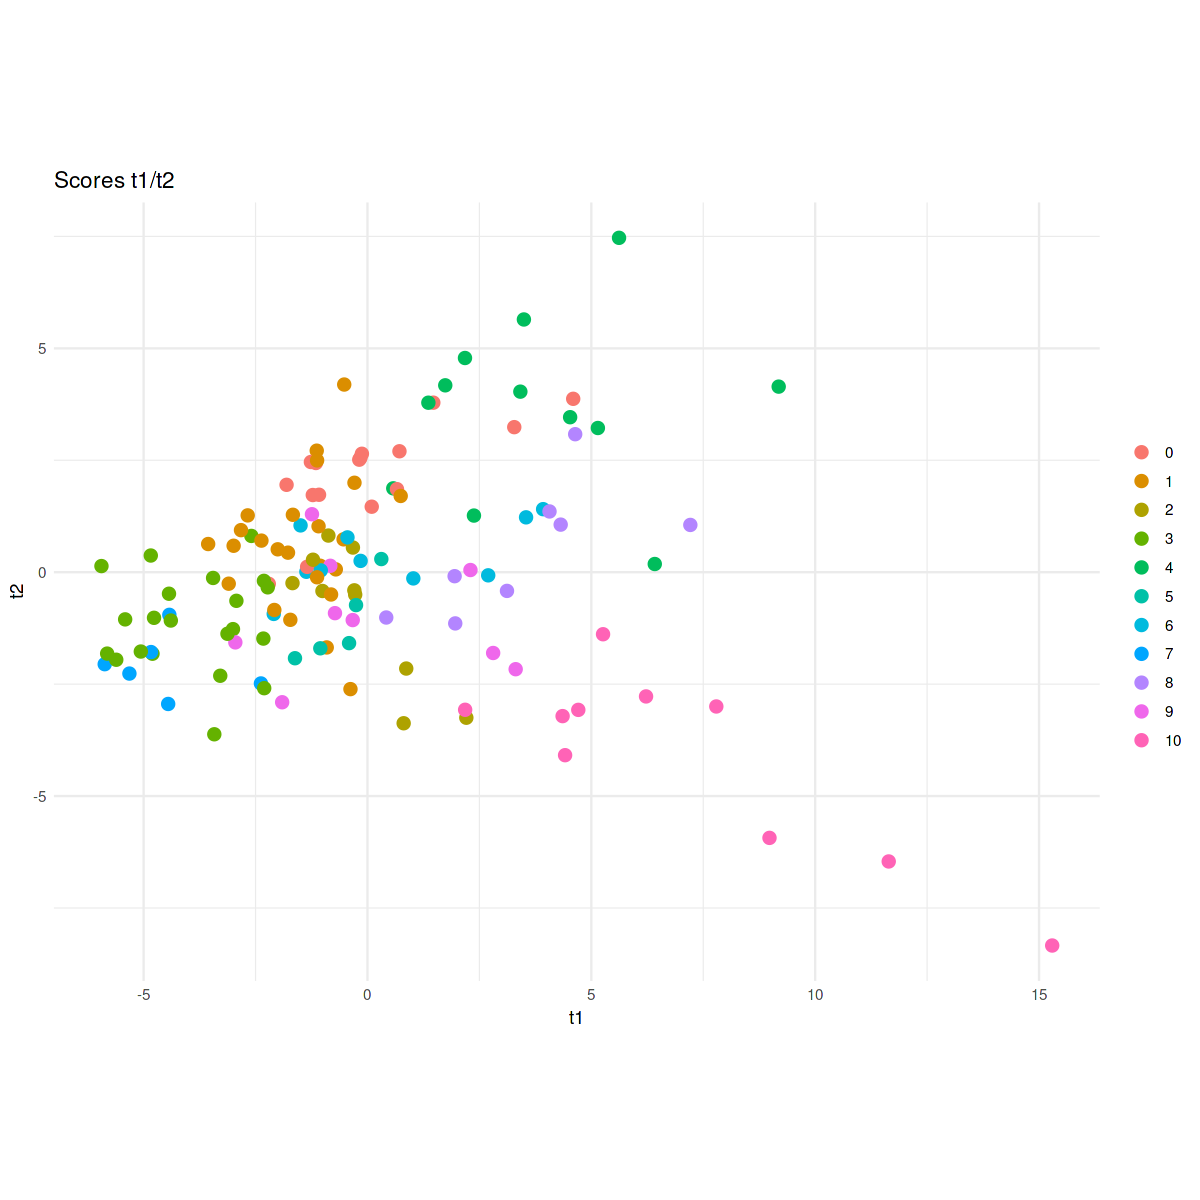

In [18]:
options(repr.plot.width=10, repr.plot.height=10)

ggplot(as.data.frame(mypls@scoreMN), aes(p1,p2, color = as.factor(df$Clusters))) + coord_fixed(ratio = 1) +
            geom_point(size = 3) + theme_minimal() + ggtitle('Scores t1/t2') + labs(y="t2", x = "t1") + theme(legend.title = element_blank())

In [19]:
wc <- function(comp1, comp2){
    a <- as.data.frame(mypls@weightStarMN)[, c(comp1,comp2)]
    b <- as.data.frame(mypls@cMN)[, c(comp1,comp2)]
    c <- rbind(a, b)
    c$color <- c( rep("X", nrow(a)), rep("Y", nrow(b)))
    colnames(c) <- c('p1', 'p2', 'Space')
    g <- ggplot(c, aes(p1,p2, label = rownames(c), colour = Space)) +
                geom_point() + geom_label(size = 3, hjust= 'left') +
                theme_minimal() + ggtitle(paste('Weights w',comp1,'*c',comp1,'/w', comp2,'*c',comp2)) + labs(y=paste('w', comp2, '*', 'c', comp2), x = paste('w', comp1, '*', 'c', comp1)) +
                geom_hline(yintercept=0, size=0.5) + geom_vline(xintercept=0, size=0.5)
    return (g)
}

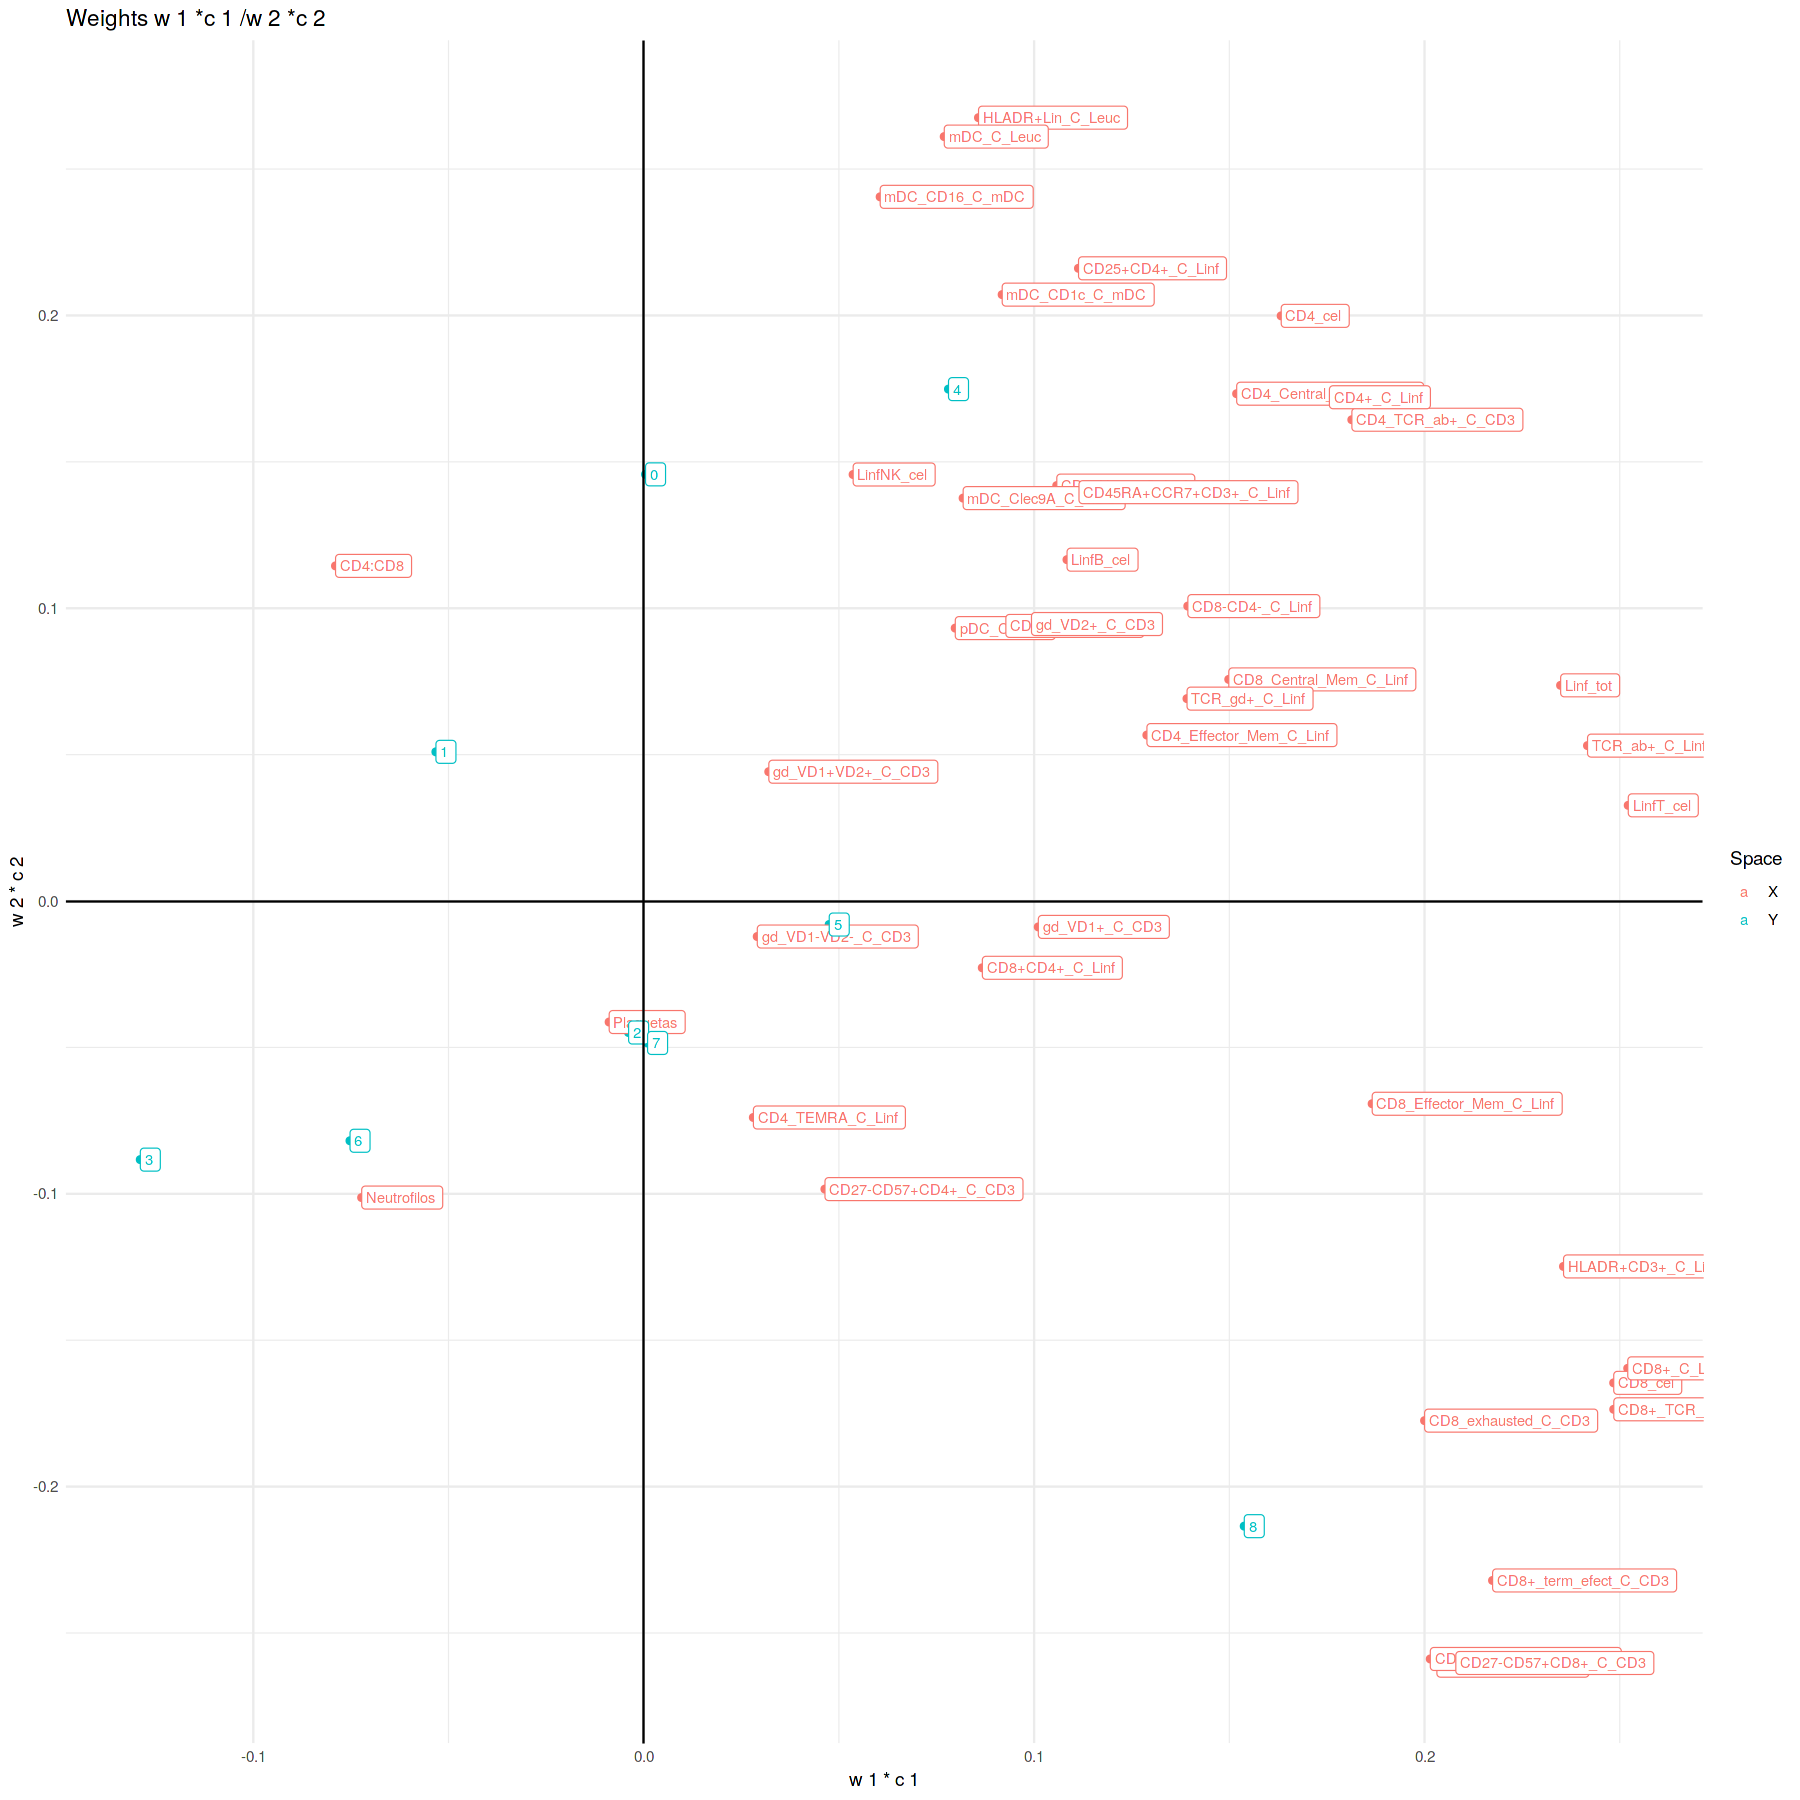

In [20]:
options(repr.plot.width=15, repr.plot.height=15)
wc(1,2)

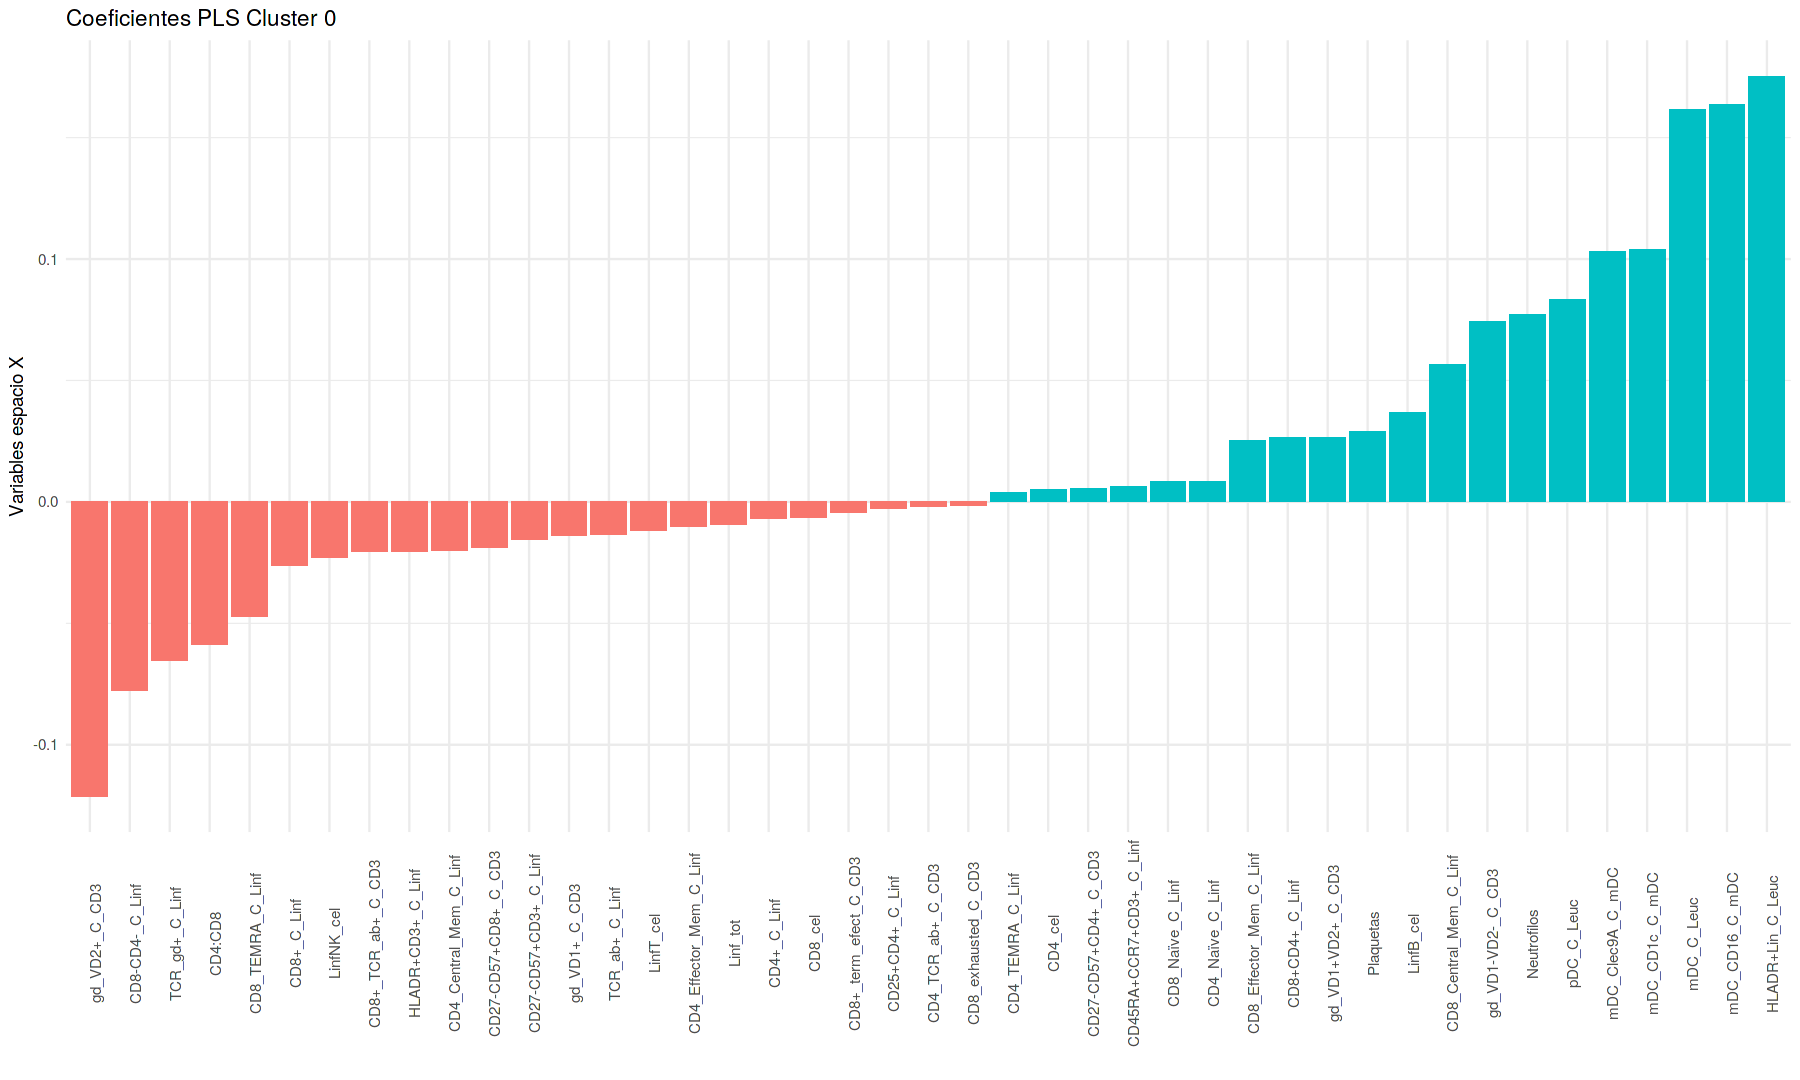

In [21]:
options(repr.plot.width=15, repr.plot.height=9)
coefs <- as.data.frame(mypls@coefficientMN)
coefs$names <- factor(rownames(coefs), levels = rownames(coefs)[order(coefs[,1])])
coefs <- coefs[order(coefs[,1]),]
#x$name <- factor(x$name, levels = x$name[order(x$val)])
#coefs$names <- rownames(coefs)
coefs$colors <- ifelse(coefs[,1] >= 0, "positive", "negative")
g <- ggplot(coefs, aes(y = `0`, x = names, fill = colors)) + geom_col(show.legend = FALSE) +
ggtitle('Coeficientes PLS Cluster 0') + labs(y="Variables espacio X", x = "") + theme_minimal() + theme(axis.text.x = element_text(angle = 90))
g

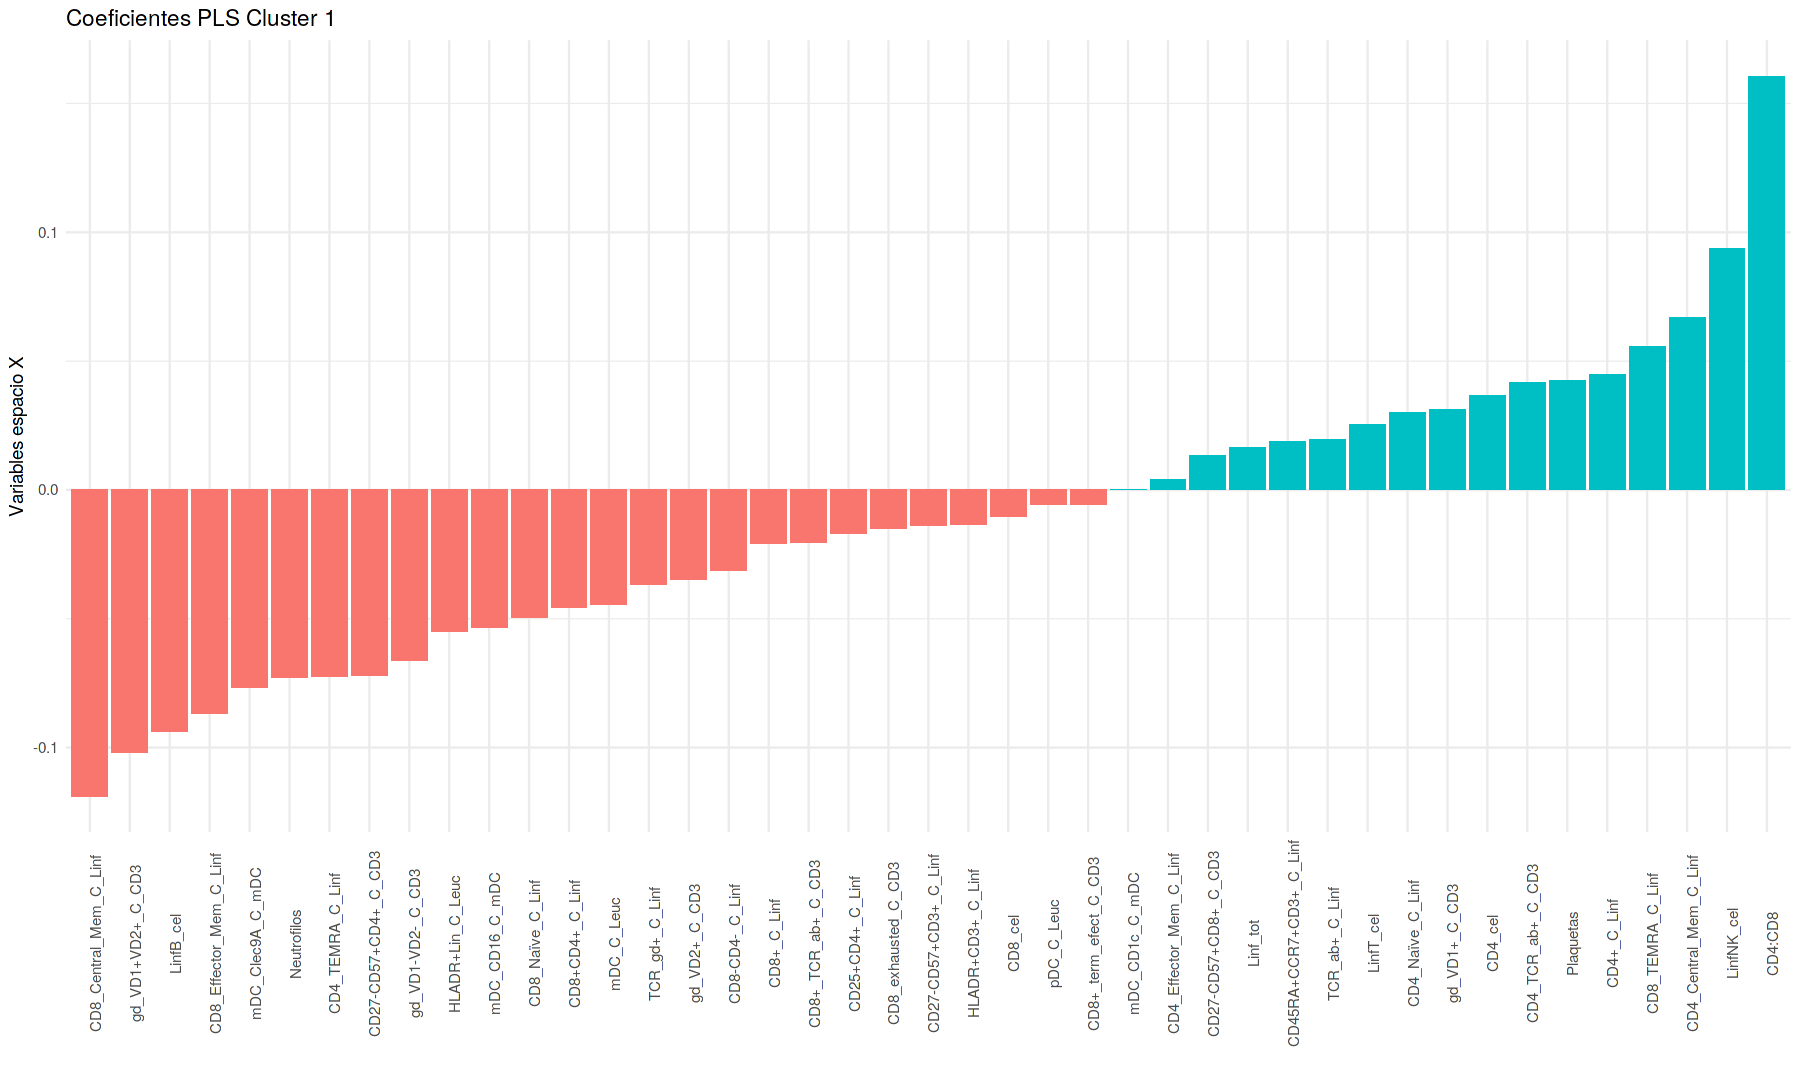

In [22]:
options(repr.plot.width=15, repr.plot.height=9)
coefs$names <- factor(rownames(coefs), levels = rownames(coefs)[order(coefs[,2])])
coefs <- coefs[order(coefs[,2]),]
coefs$colors <- ifelse(coefs[,2] >= 0, "positive", "negative")
g <- ggplot(coefs, aes(y = `1`, x = names, fill = colors)) + geom_col(show.legend = FALSE) +
ggtitle('Coeficientes PLS Cluster 1') + labs(y="Variables espacio X", x = "") + theme_minimal() + theme(axis.text.x = element_text(angle = 90))
g

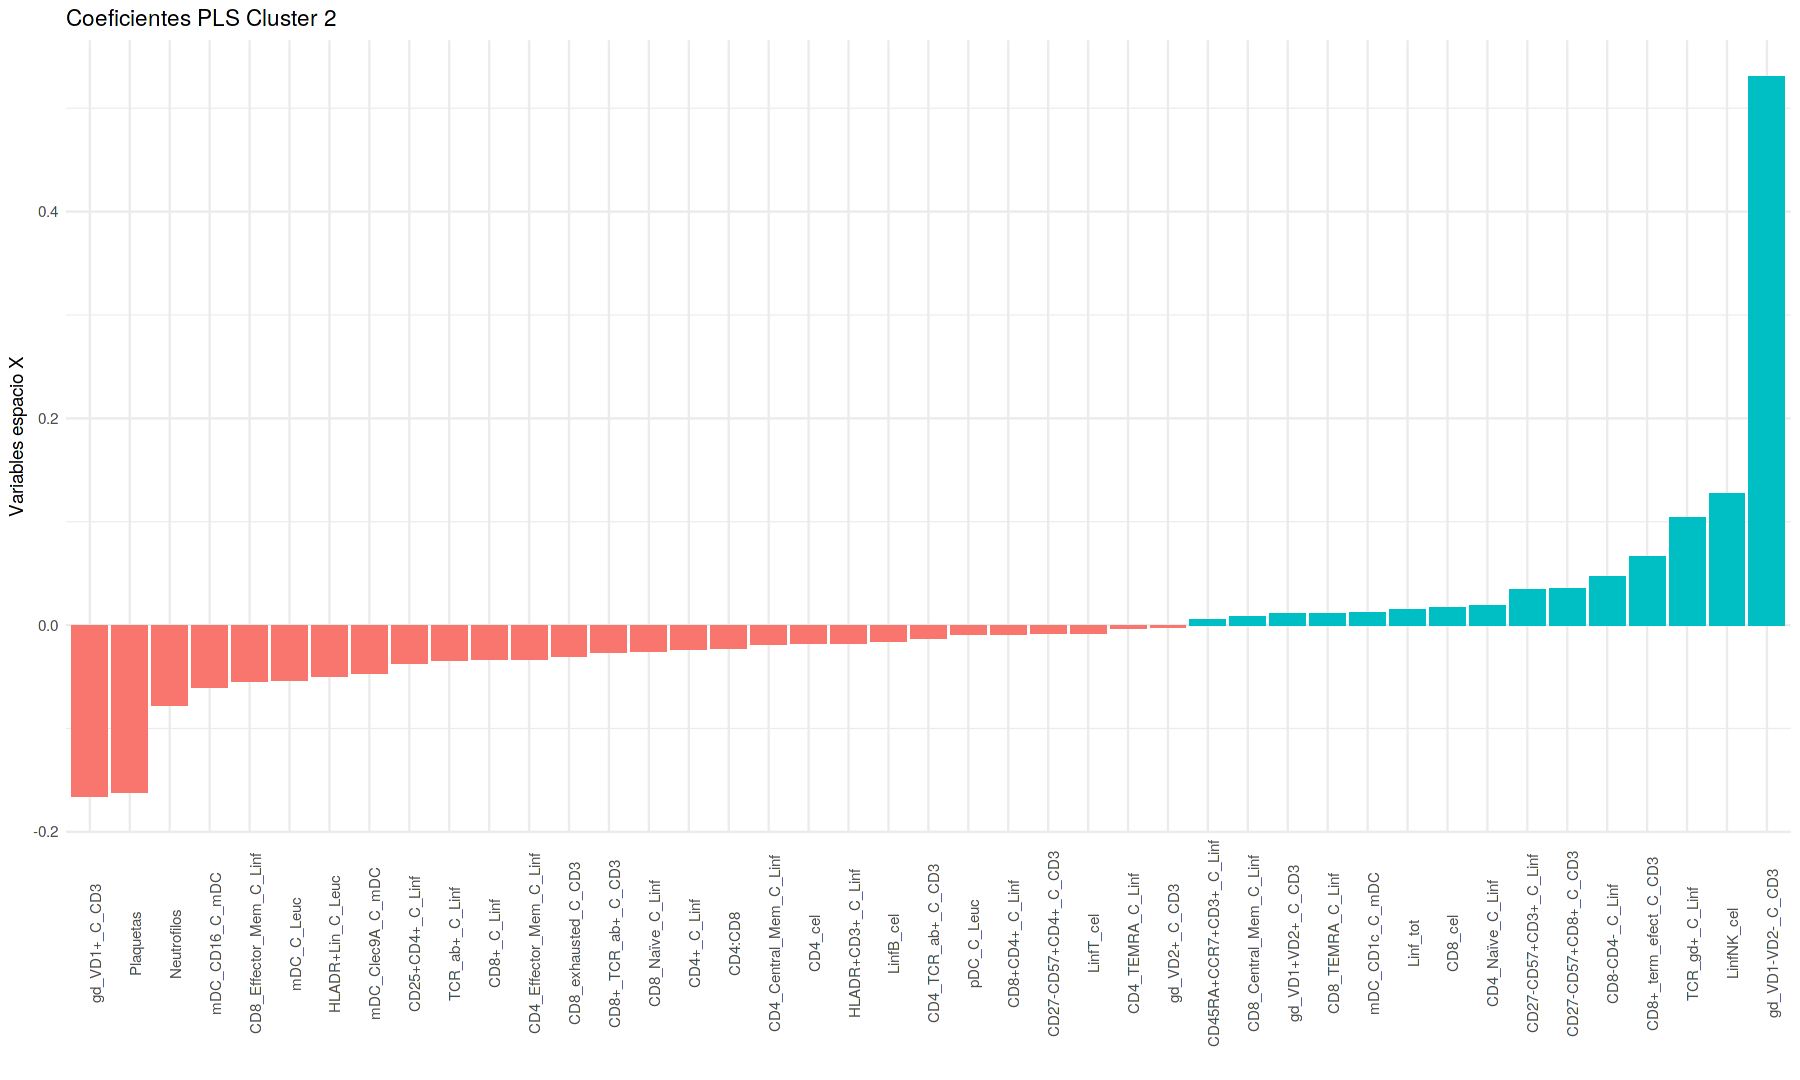

In [23]:
options(repr.plot.width=15, repr.plot.height=9)
coefs$names <- factor(rownames(coefs), levels = rownames(coefs)[order(coefs[,3])])
coefs <- coefs[order(coefs[,3]),]
coefs$colors <- ifelse(coefs[,3] >= 0, "positive", "negative")
g <- ggplot(coefs, aes(y = `2`, x = names, fill = colors)) + geom_col(show.legend = FALSE) +
ggtitle('Coeficientes PLS Cluster 2') + labs(y="Variables espacio X", x = "") + theme_minimal() + theme(axis.text.x = element_text(angle = 90))
g

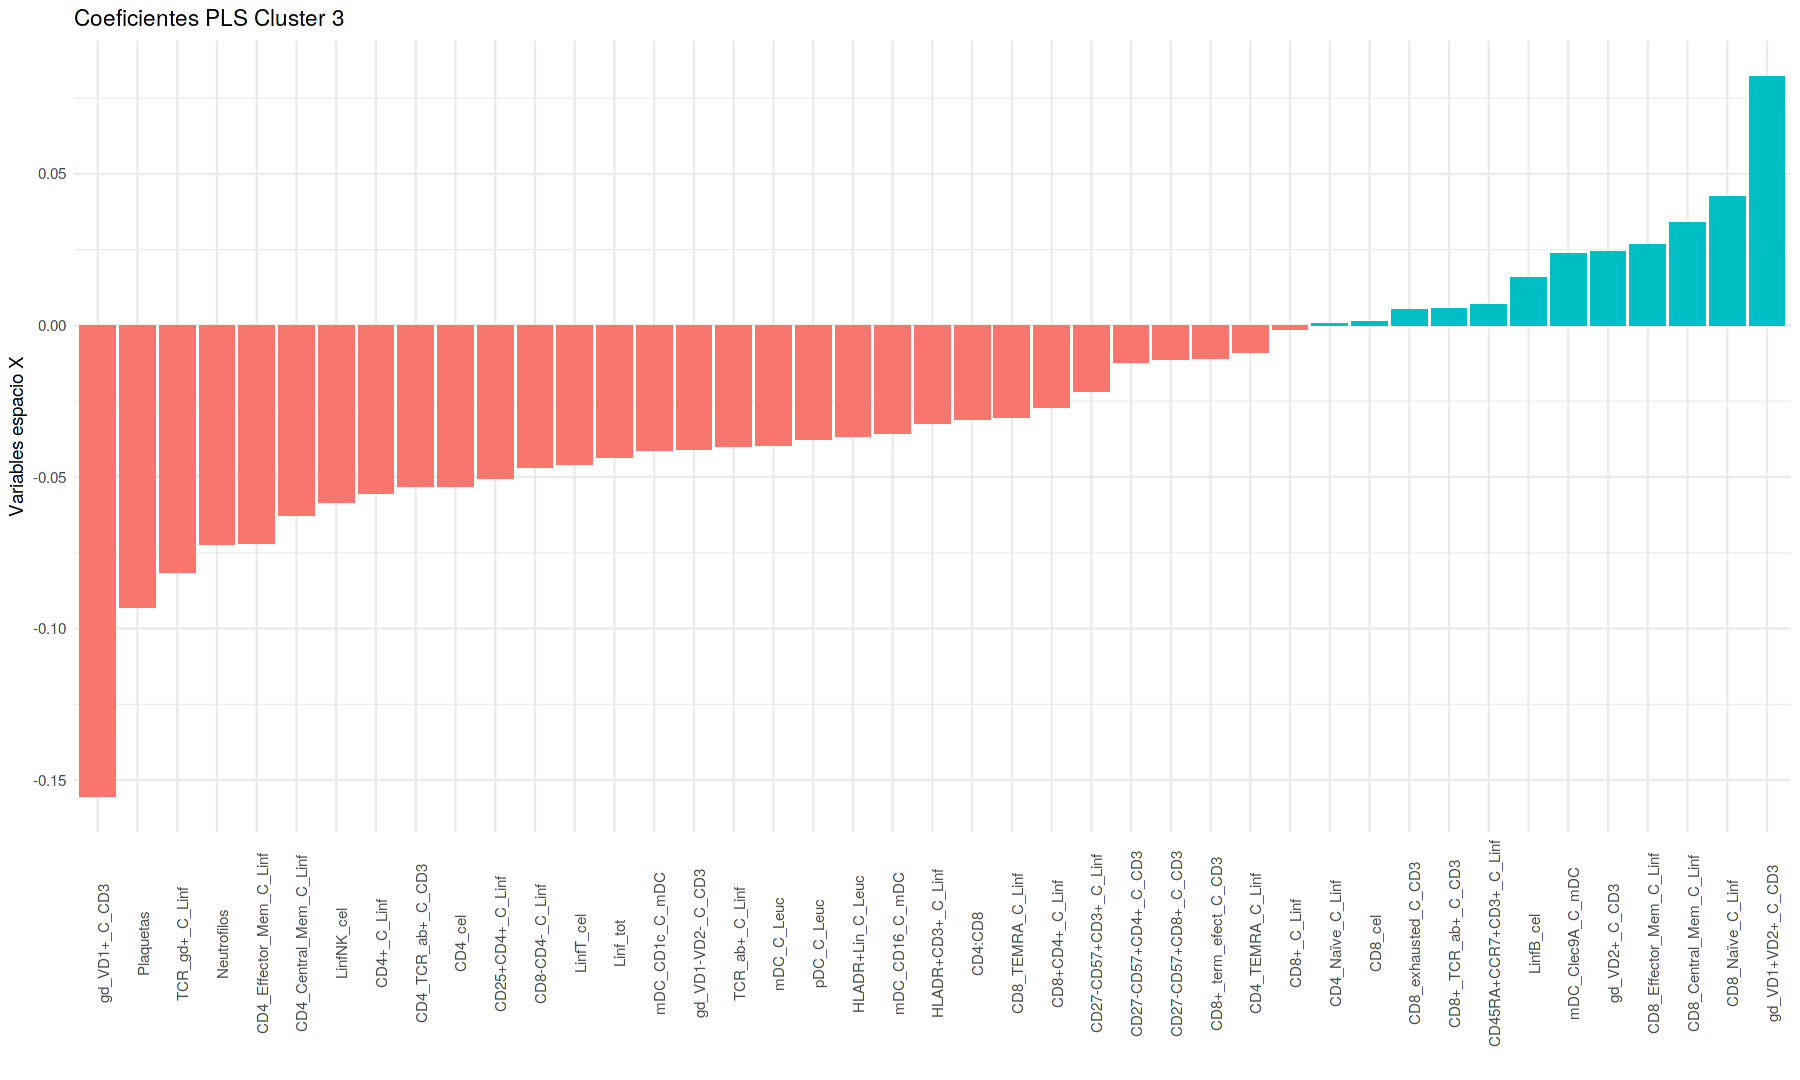

In [24]:
options(repr.plot.width=15, repr.plot.height=9)
coefs$names <- factor(rownames(coefs), levels = rownames(coefs)[order(coefs[,4])])
coefs <- coefs[order(coefs[,4]),]
coefs$colors <- ifelse(coefs[,4] >= 0, "positive", "negative")
g <- ggplot(coefs, aes(y = `3`, x = names, fill = colors)) + geom_col(show.legend = FALSE) +
ggtitle('Coeficientes PLS Cluster 3') + labs(y="Variables espacio X", x = "") + theme_minimal() + theme(axis.text.x = element_text(angle = 90))
g

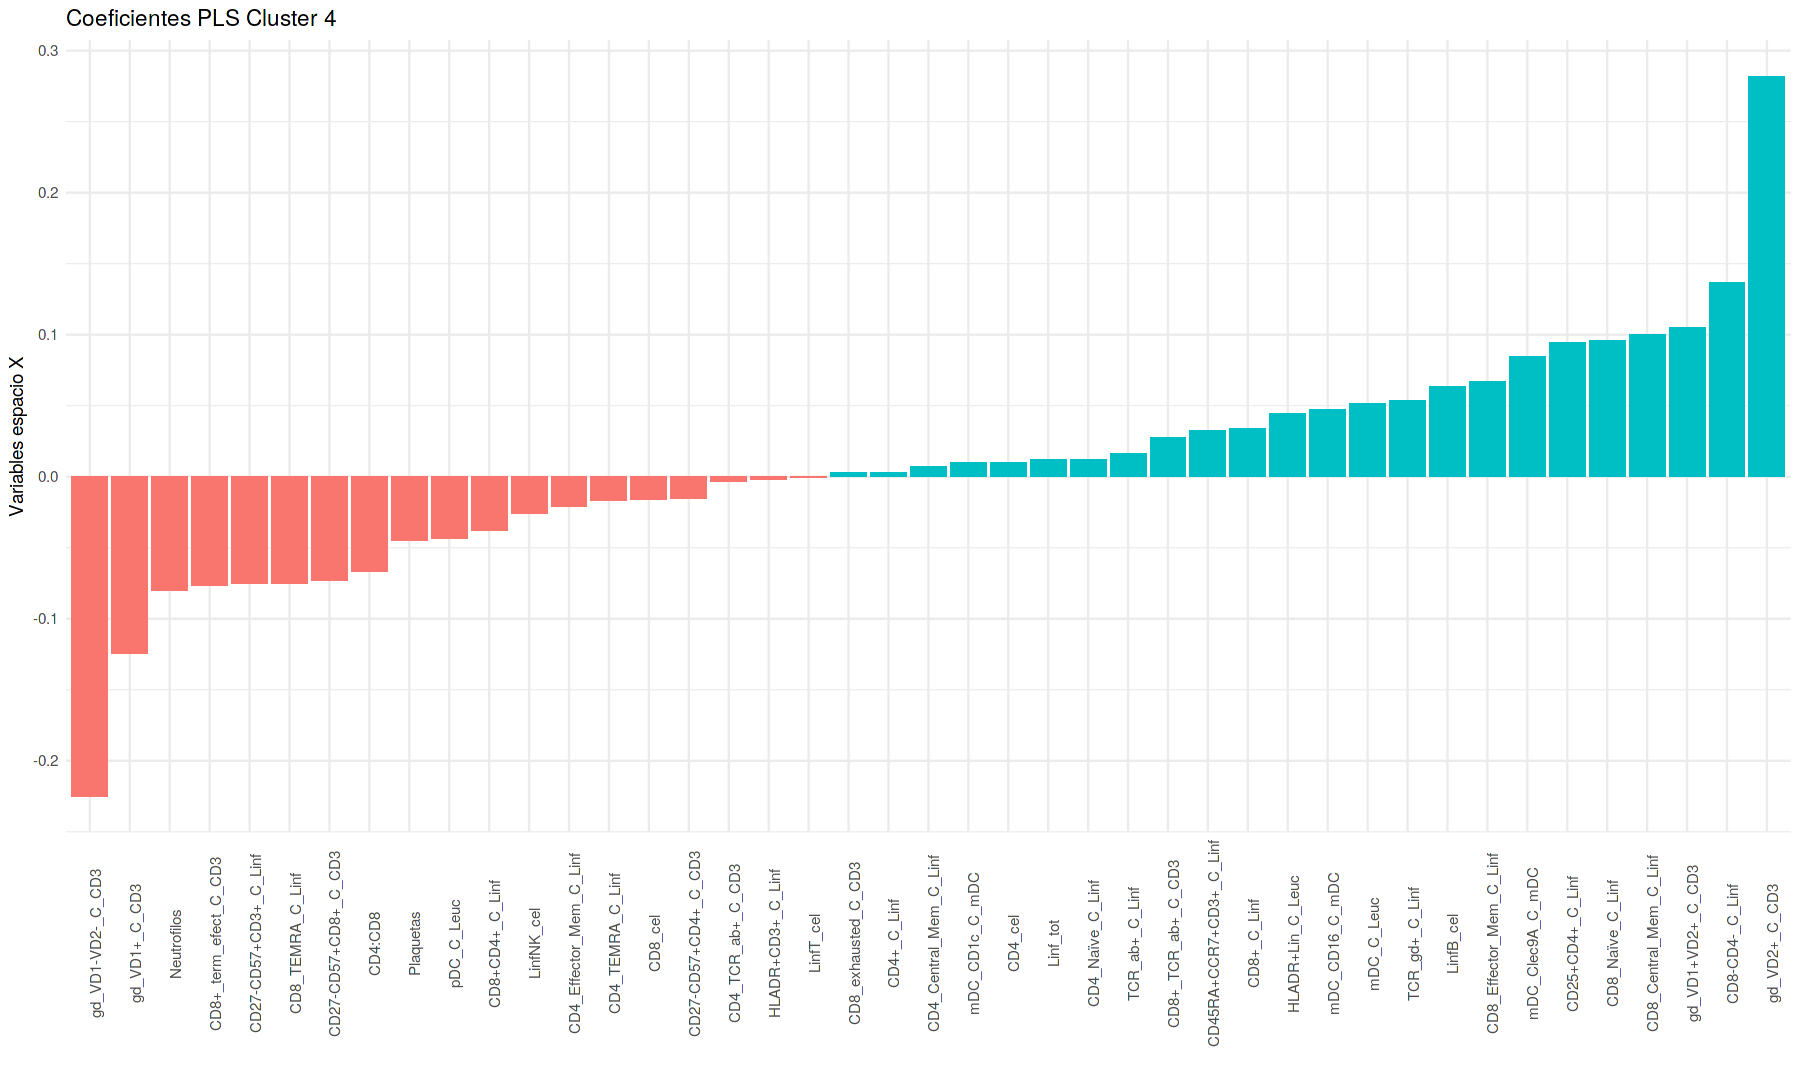

In [25]:
options(repr.plot.width=15, repr.plot.height=9)
coefs$names <- factor(rownames(coefs), levels = rownames(coefs)[order(coefs[,5])])
coefs <- coefs[order(coefs[,5]),]
coefs$colors <- ifelse(coefs[,5] >= 0, "positive", "negative")
g <- ggplot(coefs, aes(y = `4`, x = names, fill = colors)) + geom_col(show.legend = FALSE) +
ggtitle('Coeficientes PLS Cluster 4') + labs(y="Variables espacio X", x = "") + theme_minimal() + theme(axis.text.x = element_text(angle = 90))
g

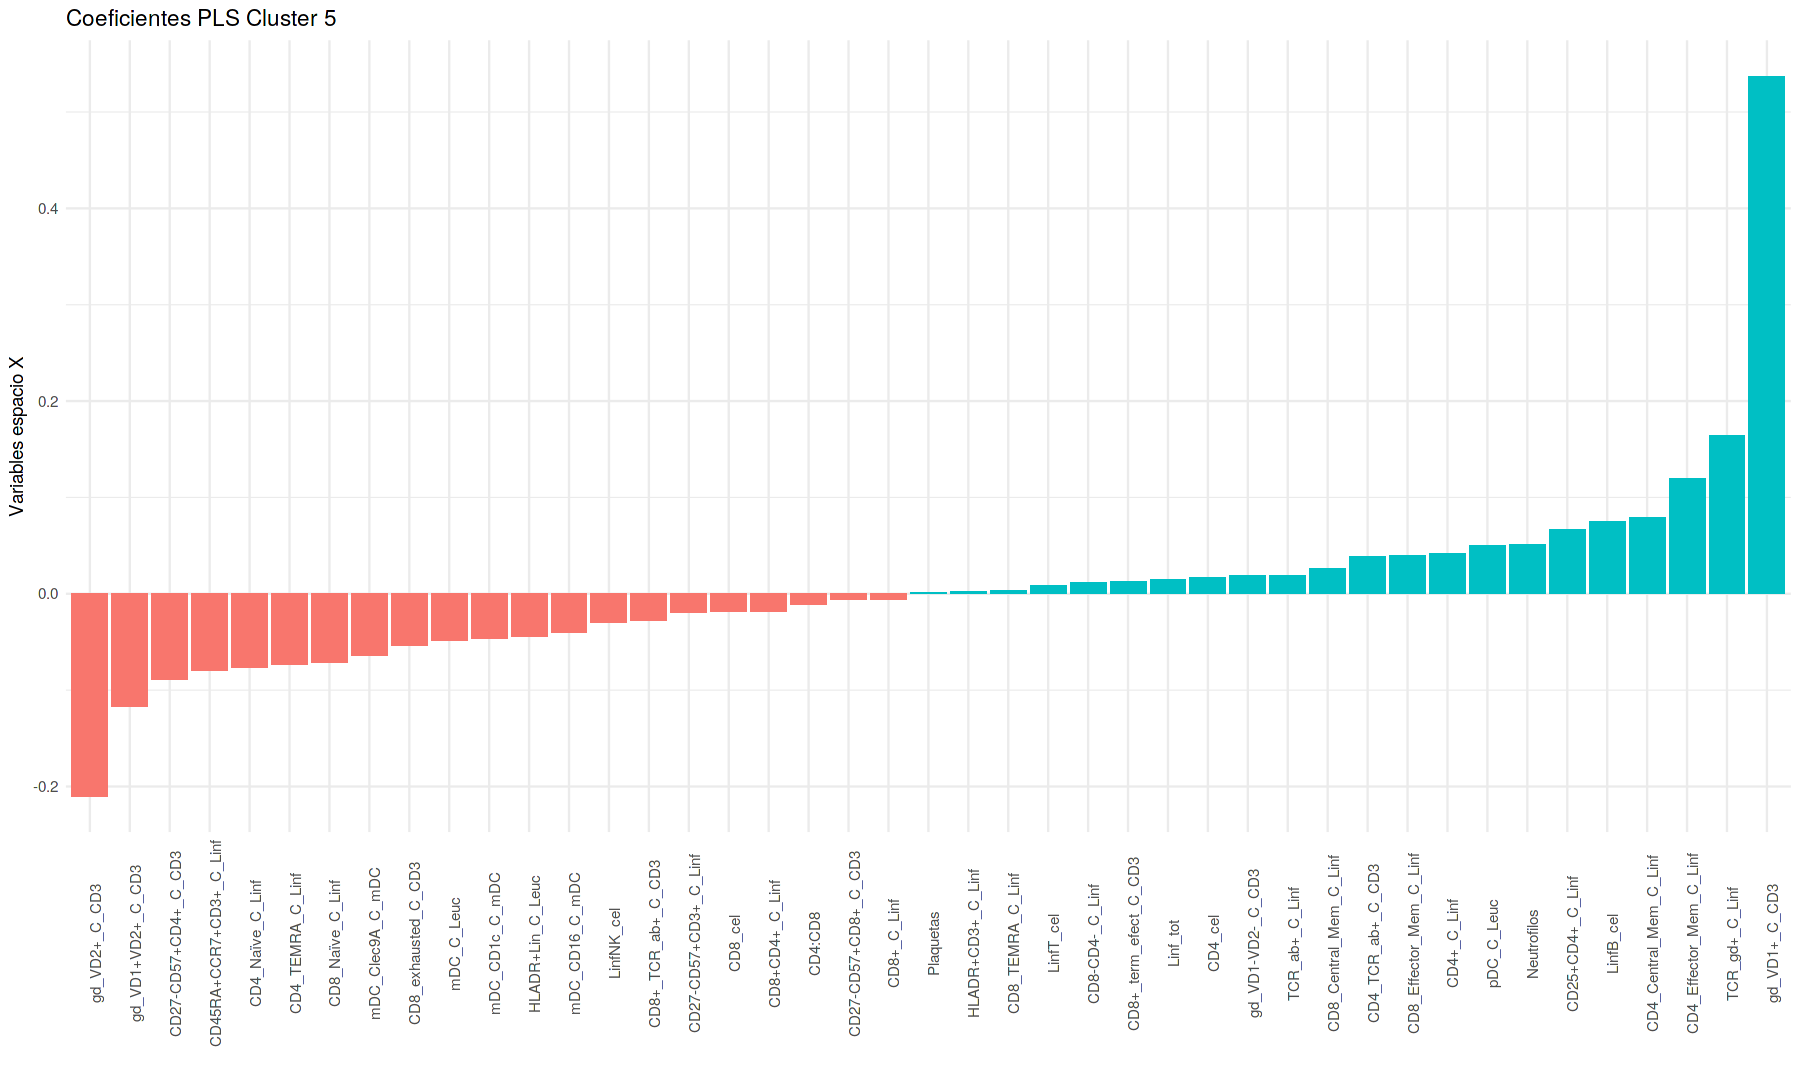

In [26]:
options(repr.plot.width=15, repr.plot.height=9)
coefs$names <- factor(rownames(coefs), levels = rownames(coefs)[order(coefs[,6])])
coefs <- coefs[order(coefs[,6]),]
coefs$colors <- ifelse(coefs[,6] >= 0, "positive", "negative")
g <- ggplot(coefs, aes(y = `5`, x = names, fill = colors)) + geom_col(show.legend = FALSE) +
ggtitle('Coeficientes PLS Cluster 5') + labs(y="Variables espacio X", x = "") + theme_minimal() + theme(axis.text.x = element_text(angle = 90))
g

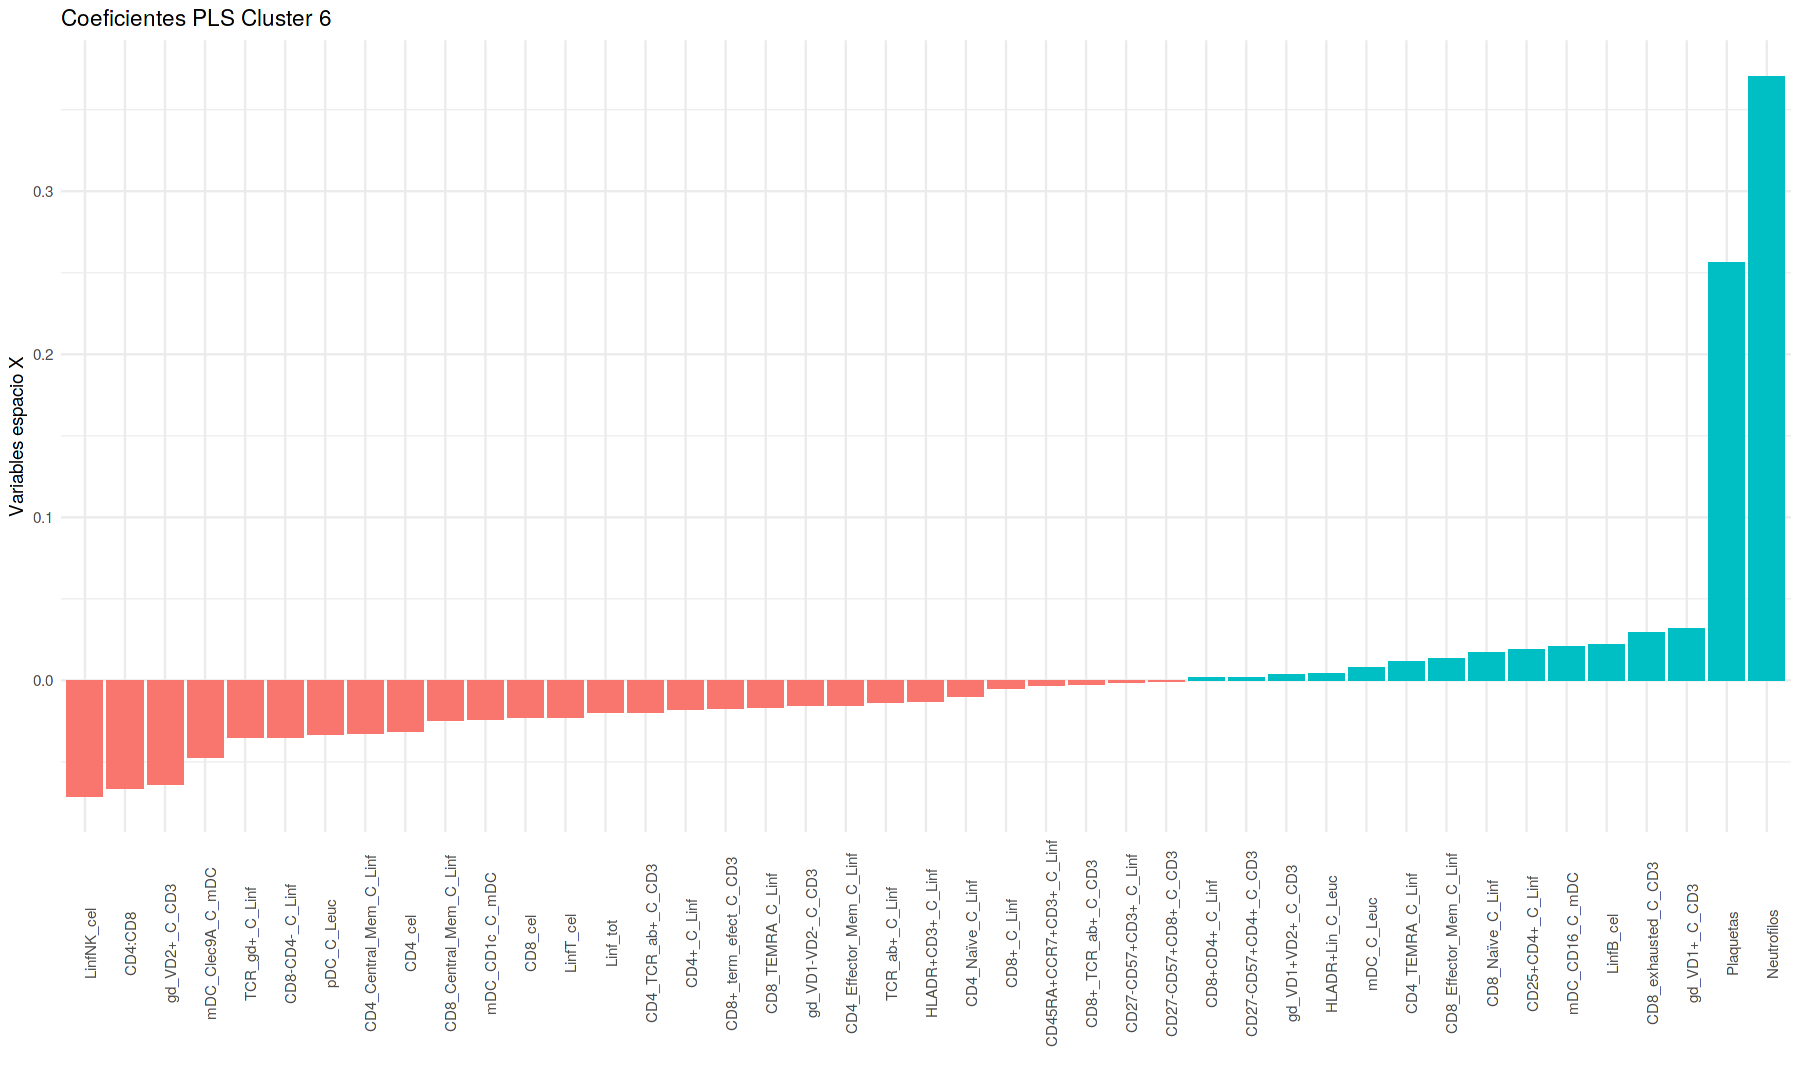

In [27]:
options(repr.plot.width=15, repr.plot.height=9)
coefs$names <- factor(rownames(coefs), levels = rownames(coefs)[order(coefs[,7])])
coefs <- coefs[order(coefs[,7]),]
coefs$colors <- ifelse(coefs[,7] >= 0, "positive", "negative")
g <- ggplot(coefs, aes(y = `6`, x = names, fill = colors)) + geom_col(show.legend = FALSE) +
ggtitle('Coeficientes PLS Cluster 6') + labs(y="Variables espacio X", x = "") + theme_minimal() + theme(axis.text.x = element_text(angle = 90))
g

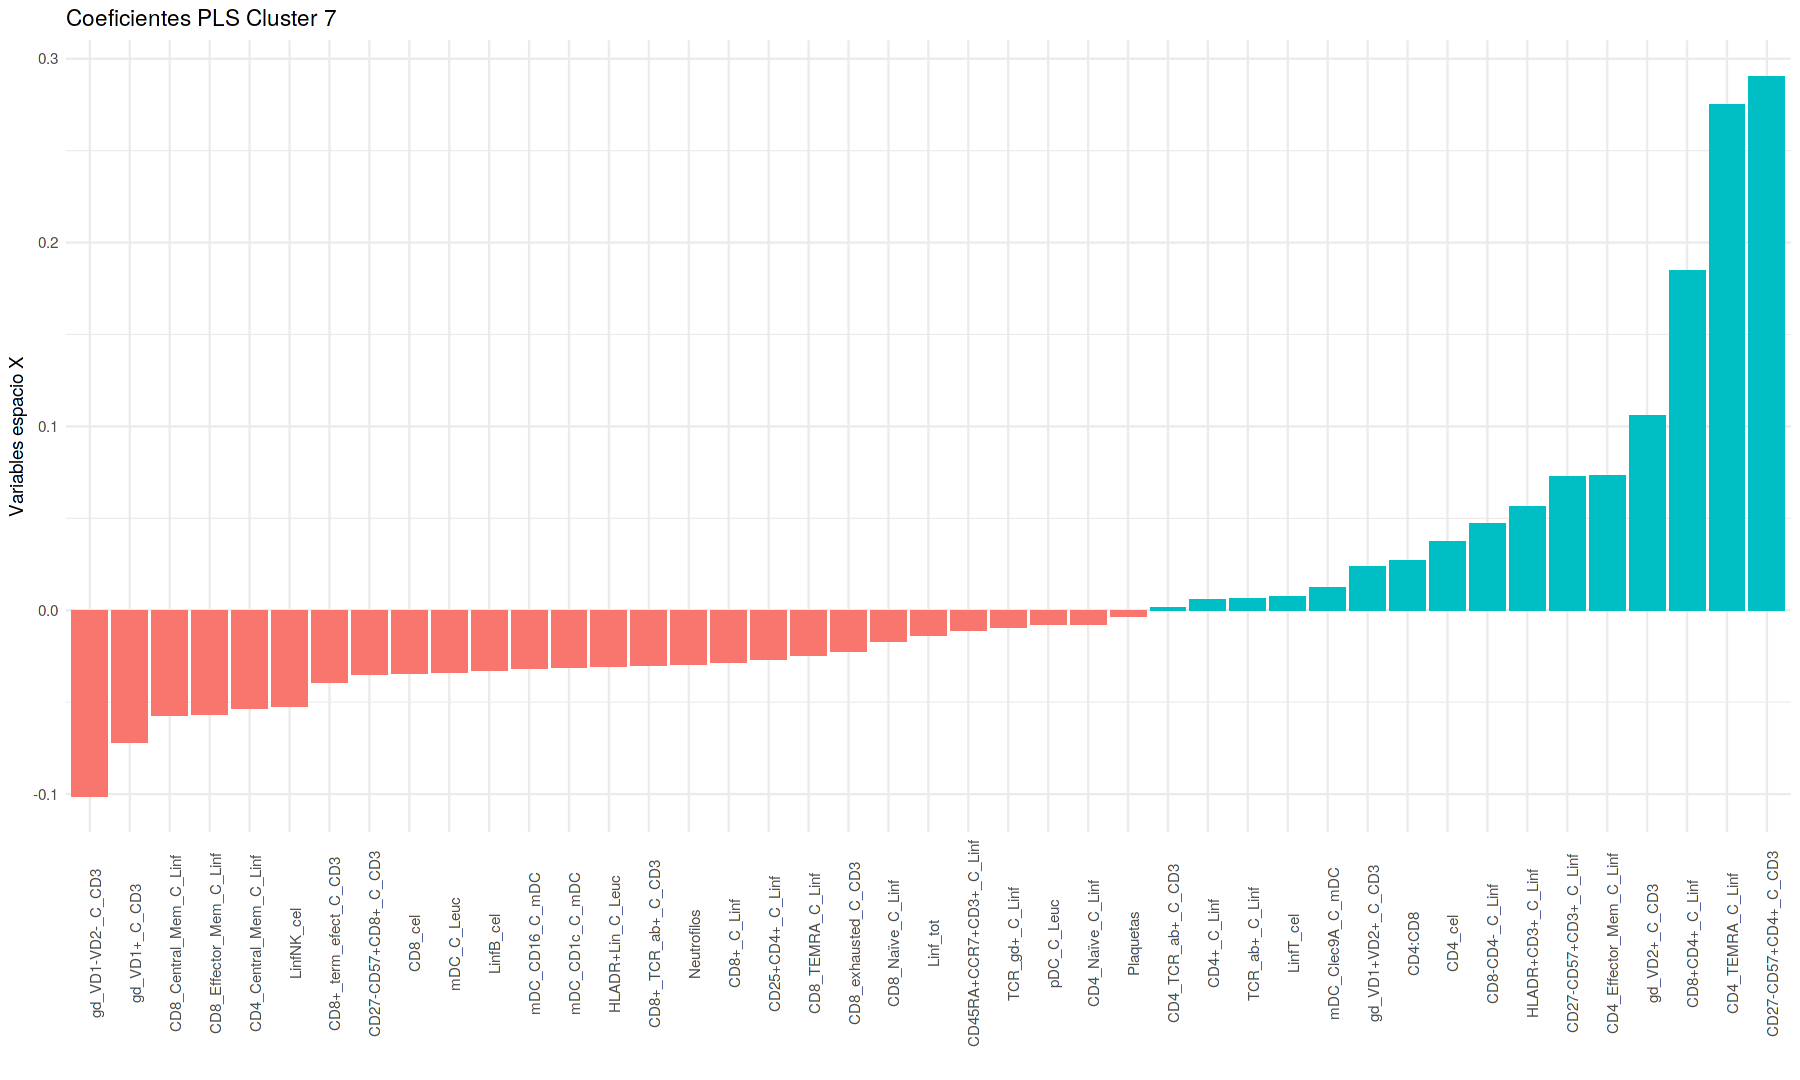

In [28]:
options(repr.plot.width=15, repr.plot.height=9)
coefs$names <- factor(rownames(coefs), levels = rownames(coefs)[order(coefs[,8])])
coefs <- coefs[order(coefs[,8]),]
coefs$colors <- ifelse(coefs[,8] >= 0, "positive", "negative")
g <- ggplot(coefs, aes(y = `7`, x = names, fill = colors)) + geom_col(show.legend = FALSE) +
ggtitle('Coeficientes PLS Cluster 7') + labs(y="Variables espacio X", x = "") + theme_minimal() + theme(axis.text.x = element_text(angle = 90))
g

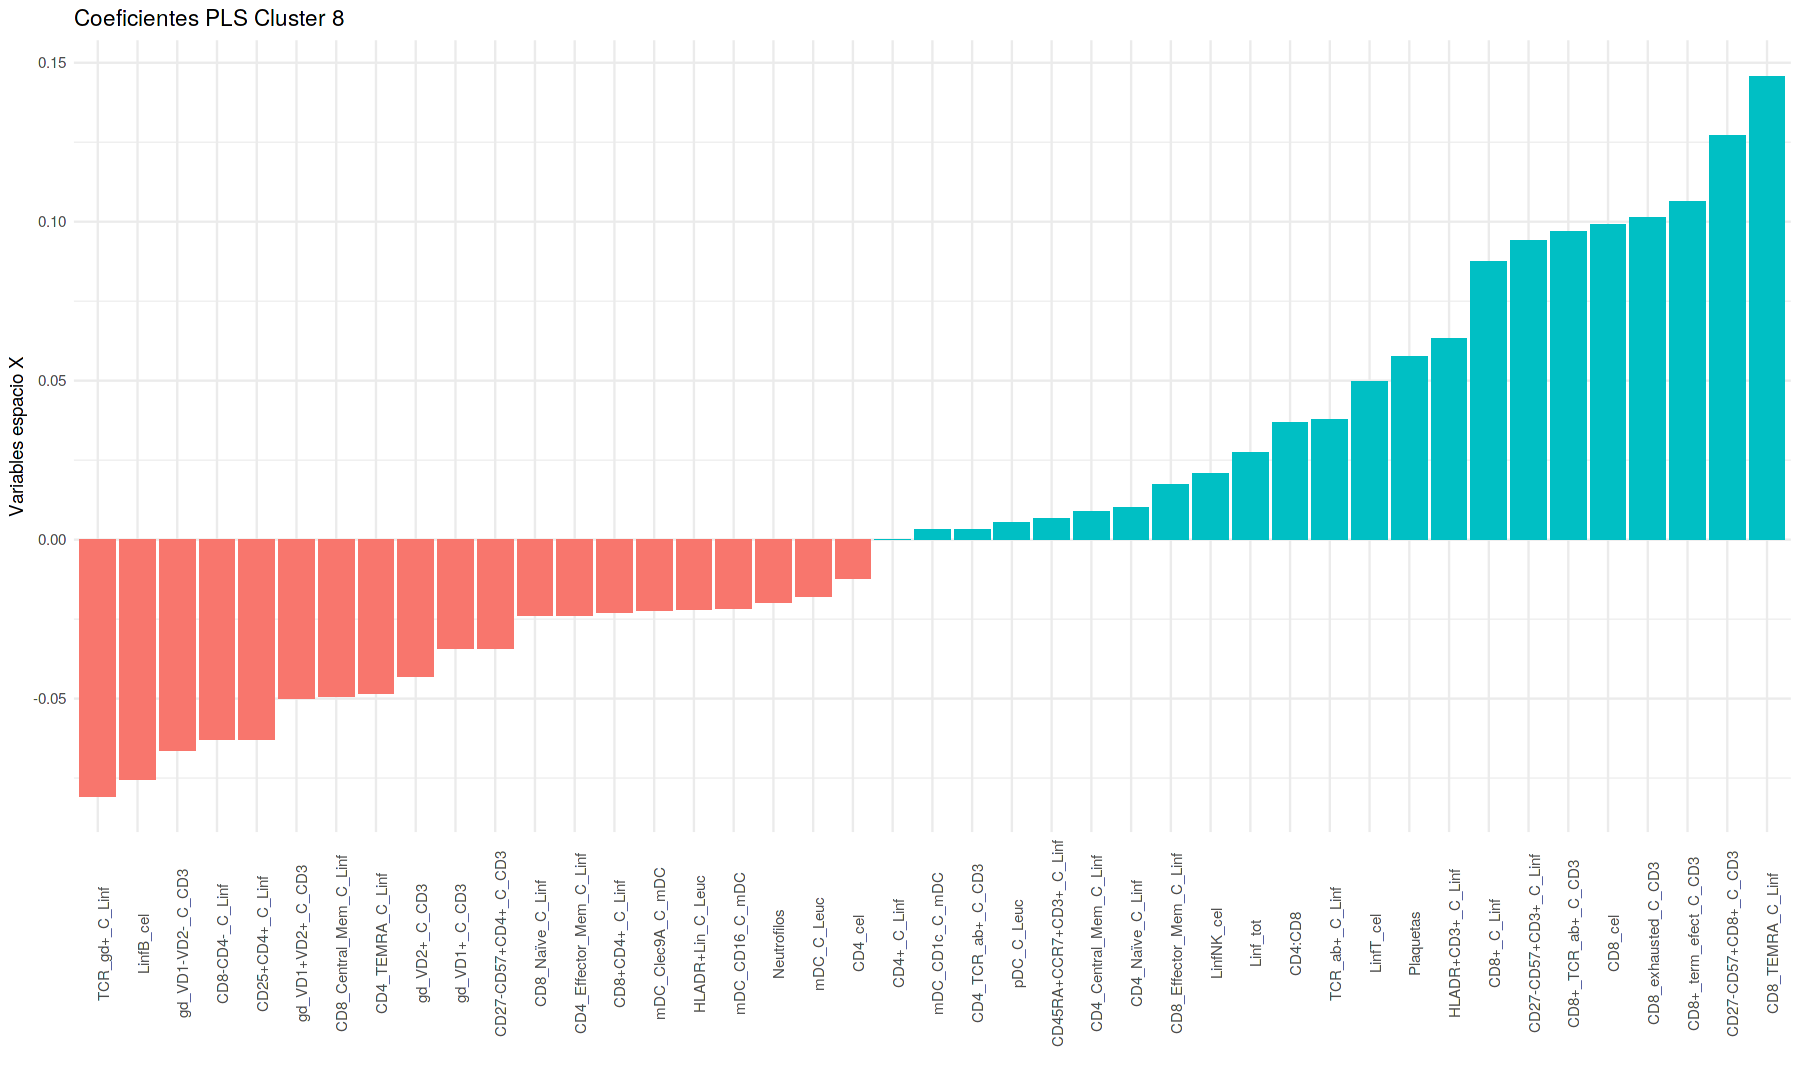

In [29]:
options(repr.plot.width=15, repr.plot.height=9)
coefs$names <- factor(rownames(coefs), levels = rownames(coefs)[order(coefs[,9])])
coefs <- coefs[order(coefs[,9]),]
coefs$colors <- ifelse(coefs[,9] >= 0, "positive", "negative")
g <- ggplot(coefs, aes(y = `8`, x = names, fill = colors)) + geom_col(show.legend = FALSE) +
ggtitle('Coeficientes PLS Cluster 8') + labs(y="Variables espacio X", x = "") + theme_minimal() + theme(axis.text.x = element_text(angle = 90))
g

In [40]:
coef_ <- coefs[,-c(10, 11)]
coef_t <- t(coef_)
rownames(coef_t) <- colnames(coef_)
colnames(coef_t) <- rownames(coef_)

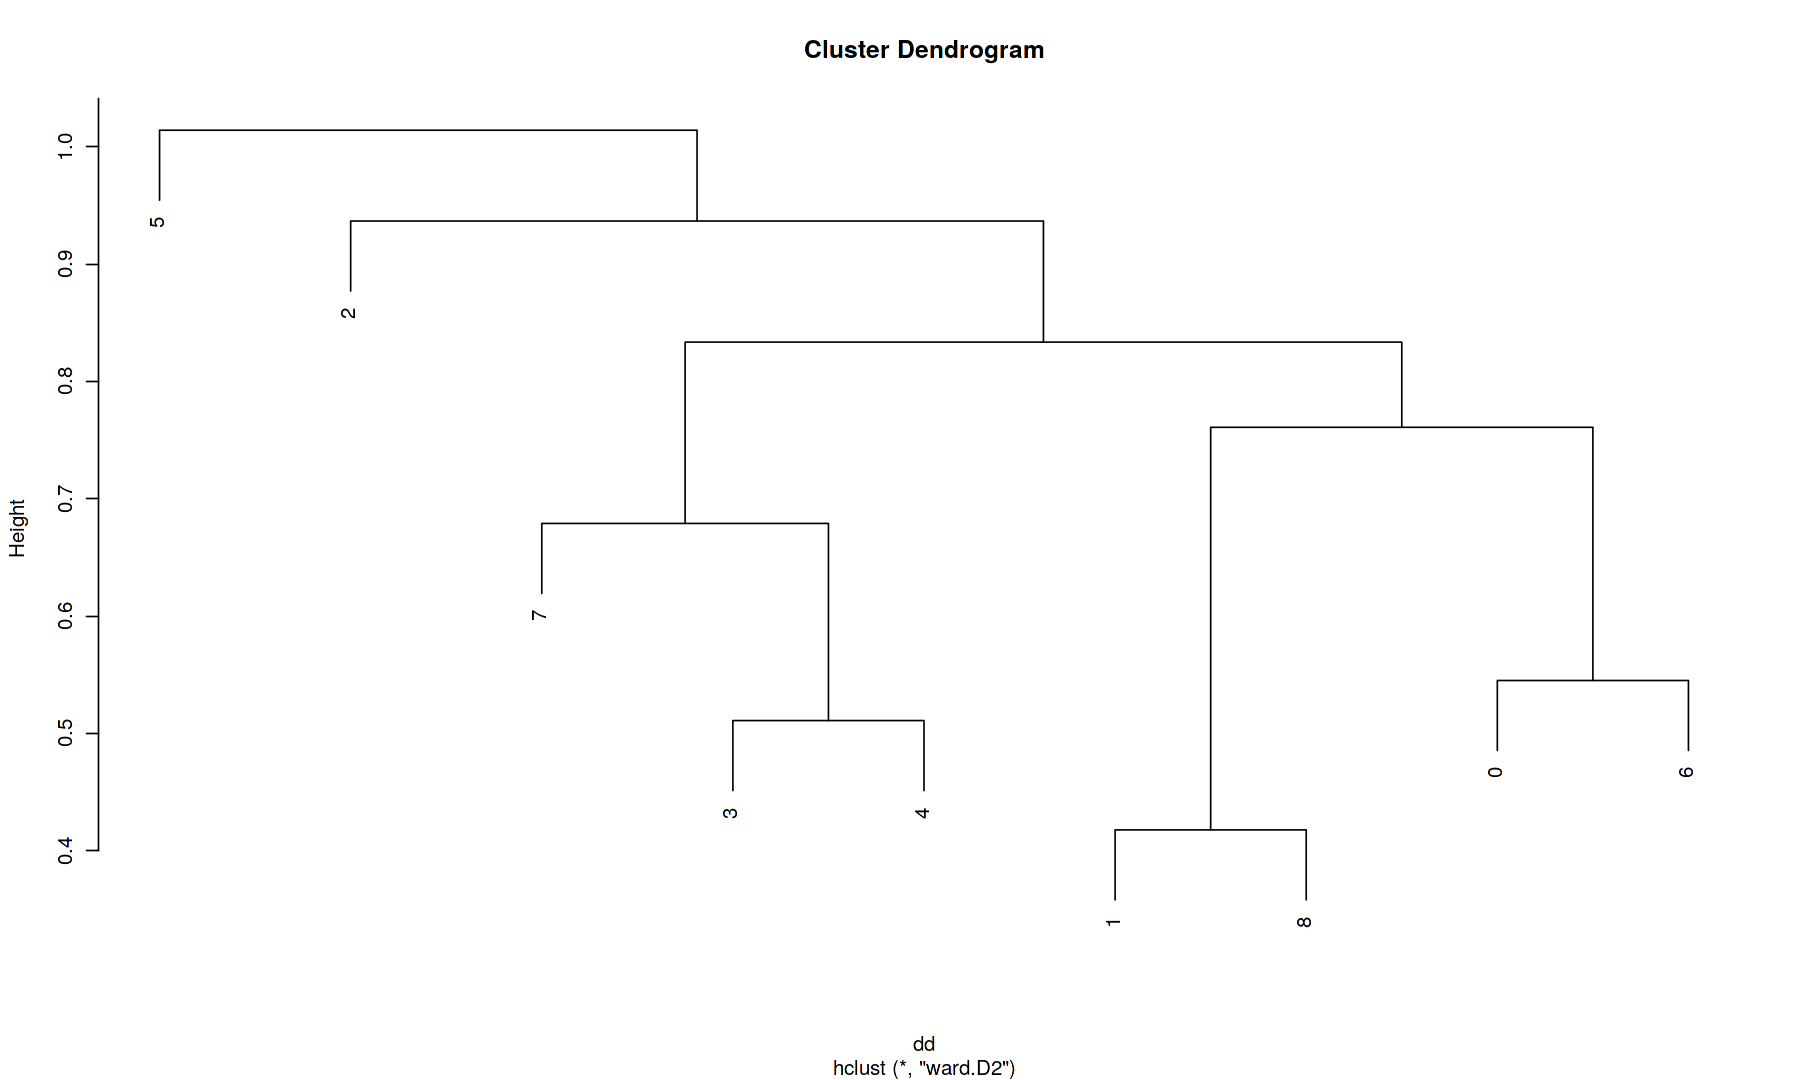

In [42]:
dd <- dist(coef_t, method = "euclidean")
hc <- hclust(dd, method = "ward.D2")
options(repr.plot.width=15, repr.plot.height=9)
plot(hc)

In [43]:
X_std <- scale(X)
X_std_w_cluster <- cbind(X_std, Y)

In [44]:
library(matrixStats)

df_stats_cluster <- NULL

for (i in 0:8){
    c_x_std = X_std_w_cluster[which(X_std_w_cluster[,44] == i),]
    means_c <- as.data.frame(colMeans(c_x_std))
    std_c <- as.data.frame(colSds(c_x_std))
    colnames(means_c) <- c('C_means')
    means_c$sd = std_c[,1]
    means_c$ymin <-  means_c$C_means - 1.96*means_c$sd
    means_c$ymax <-  means_c$C_means + 1.96*means_c$sd
    means_c$group = i
    means_c <- means_c[-nrow(means_c),]
    means_c$vble = rownames(means_c)
    df_stats_cluster <- rbind(df_stats_cluster, means_c)
}

df_stats_cluster$group <- as.factor(df_stats_cluster$group)

In [ ]:
options(repr.plot.width=22, repr.plot.height=13)
ggplot() + geom_line(data = filter(df_stats_cluster, group == 8), aes(x = vble, y = C_means, group = 8, colour = 'c8')) + 
geom_point(data = filter(df_stats_cluster, group == 8), aes(x = vble, y = C_means, group = 8,  colour = 'c8')) +

geom_line(data = filter(df_stats_cluster, group == 5), aes(x = vble, y = C_means, group = 5, colour = 'c5')) + 
geom_point(data = filter(df_stats_cluster, group == 5), aes(x = vble, y = C_means, group = 5, colour = 'c5')) +

geom_line(data = filter(df_stats_cluster, group == 2), aes(x = vble, y = C_means, group = 2, colour = 'c2')) + 
geom_point(data = filter(df_stats_cluster, group == 2), aes(x = vble, y = C_means, group = 2, colour = 'c2')) +

ylim(-7, 7) + ggtitle('Profile of clusters 8,5,2') +  scale_colour_manual(name="Line Color", values=c('c8'="#FFC107", 'c5'="#00ACC1",
                                                                                                'c2'='#CDDC39')) +
theme_bw() + theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1))

In [ ]:
options(repr.plot.width=22, repr.plot.height=13)
ggplot() + geom_line(data = filter(df_stats_cluster, group == 6), aes(x = vble, y = C_means, group = 6, colour = 'c6')) + 
geom_point(data = filter(df_stats_cluster, group == 6), aes(x = vble, y = C_means, group = 6,  colour = 'c6')) +

geom_line(data = filter(df_stats_cluster, group == 4), aes(x = vble, y = C_means, group = 4, colour = 'c4')) + 
geom_point(data = filter(df_stats_cluster, group == 4), aes(x = vble, y = C_means, group = 4, colour = 'c4')) +

geom_line(data = filter(df_stats_cluster, group == 9), aes(x = vble, y = C_means, group = 9, colour = 'c9')) + 
geom_point(data = filter(df_stats_cluster, group == 9), aes(x = vble, y = C_means, group = 9, colour = 'c9')) +

ylim(-7, 7) + ggtitle('Profile of clusters 9,4,6') +  scale_colour_manual(name="Line Color", values=c('c6'="#f44336", 'c4'="#2196F3",
                                                                                                'c9'='#00BFA5')) +
theme_bw() + theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1))

In [ ]:
options(repr.plot.width=22, repr.plot.height=13)
ggplot() + geom_line(data = filter(df_stats_cluster, group == 10), aes(x = vble, y = C_means, group = 10, colour = 'c10')) + 
geom_point(data = filter(df_stats_cluster, group == 10), aes(x = vble, y = C_means, group = 10,  colour = 'c10')) +

geom_line(data = filter(df_stats_cluster, group == 1), aes(x = vble, y = C_means, group = 1, colour = 'c1')) + 
geom_point(data = filter(df_stats_cluster, group == 1), aes(x = vble, y = C_means, group = 1, colour = 'c1')) +

geom_line(data = filter(df_stats_cluster, group == 3), aes(x = vble, y = C_means, group = 3, colour = 'c3')) + 
geom_point(data = filter(df_stats_cluster, group == 3), aes(x = vble, y = C_means, group = 3, colour = 'c3')) +

ylim(-7, 7) + ggtitle('Profile of clusters 10,1,3') +  scale_colour_manual(name="Line Color", values=c('c10'="#d32f2f", 'c1'="#7B1FA2",
                                                                                                'c3'='#FFD600')) +
theme_bw() + theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1))

In [ ]:
options(repr.plot.width=22, repr.plot.height=13)
ggplot() + geom_line(data = filter(df_stats_cluster, group == 0), aes(x = vble, y = C_means, group = 0, colour = 'c0')) + 
geom_point(data = filter(df_stats_cluster, group == 0), aes(x = vble, y = C_means, group = 0,  colour = 'c0')) +

geom_line(data = filter(df_stats_cluster, group == 7), aes(x = vble, y = C_means, group = 7, colour = 'c7')) + 
geom_point(data = filter(df_stats_cluster, group == 7), aes(x = vble, y = C_means, group = 7, colour = 'c7')) +

ylim(-7, 7) + ggtitle('Profile of clusters 0, 7') +  scale_colour_manual(name="Line Color", values=c('c0'="#1E88E5", 'c7'="#FF5722")) +
theme_bw() + theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1))

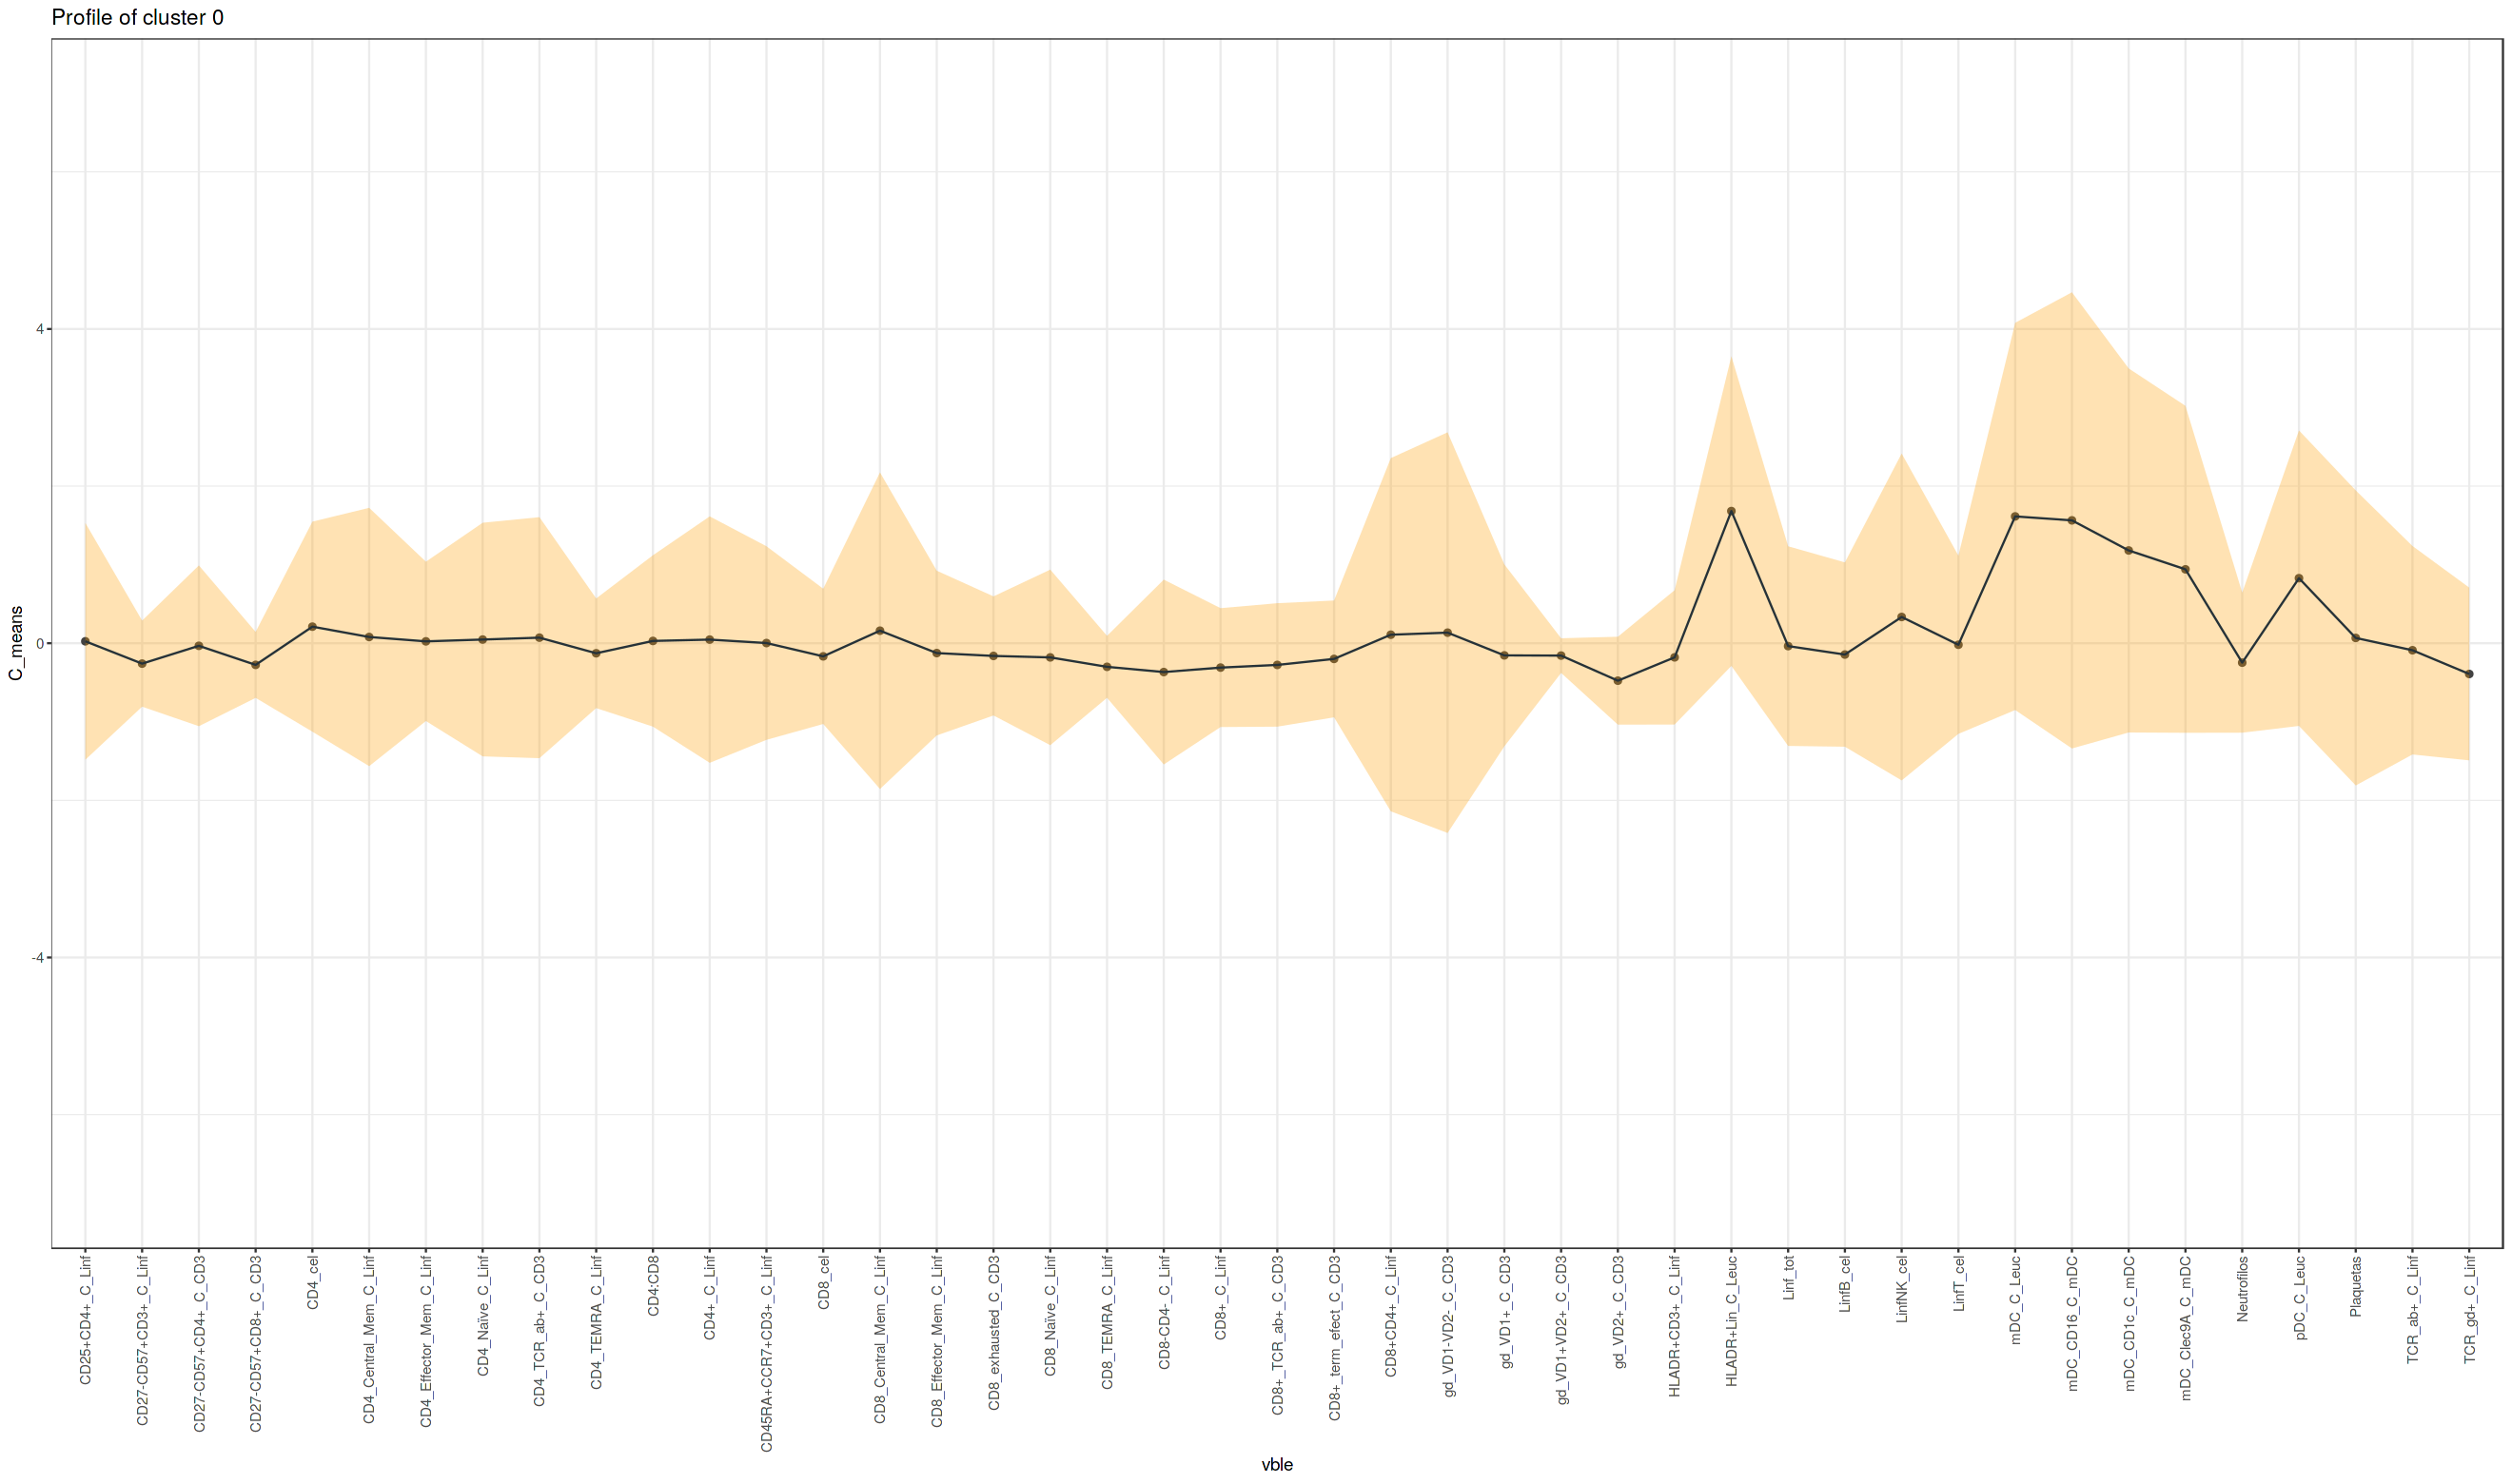

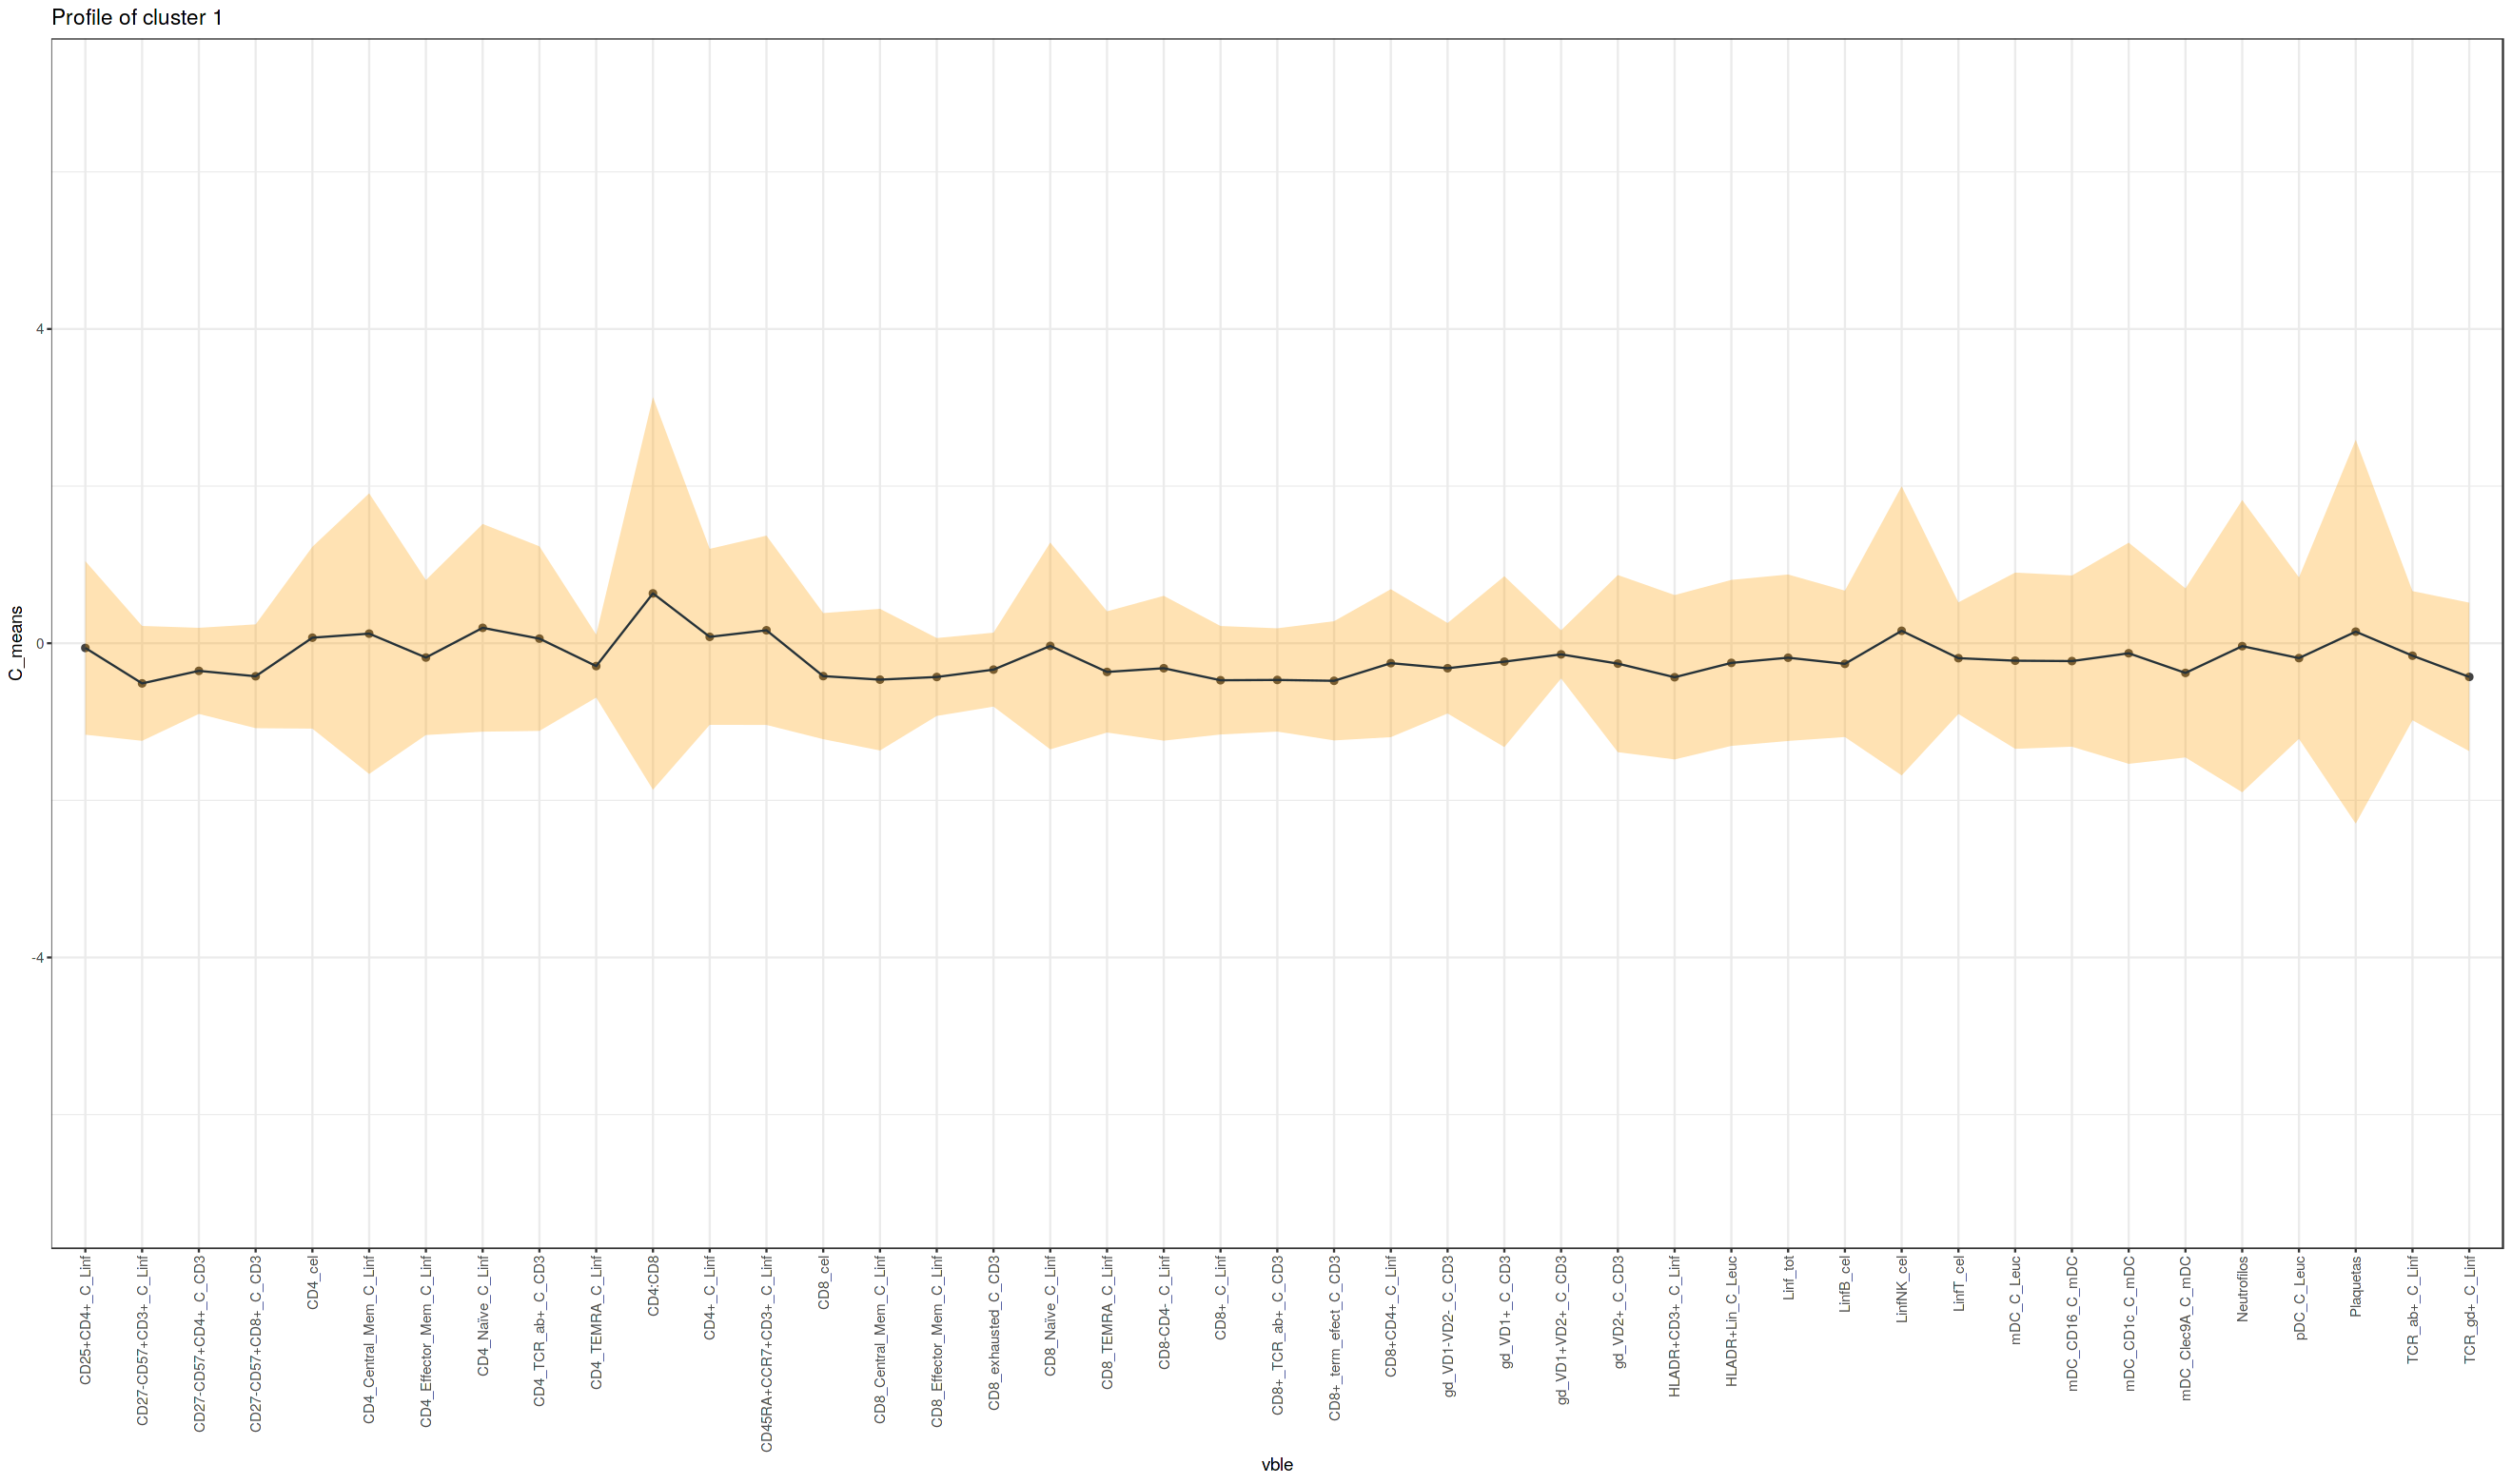

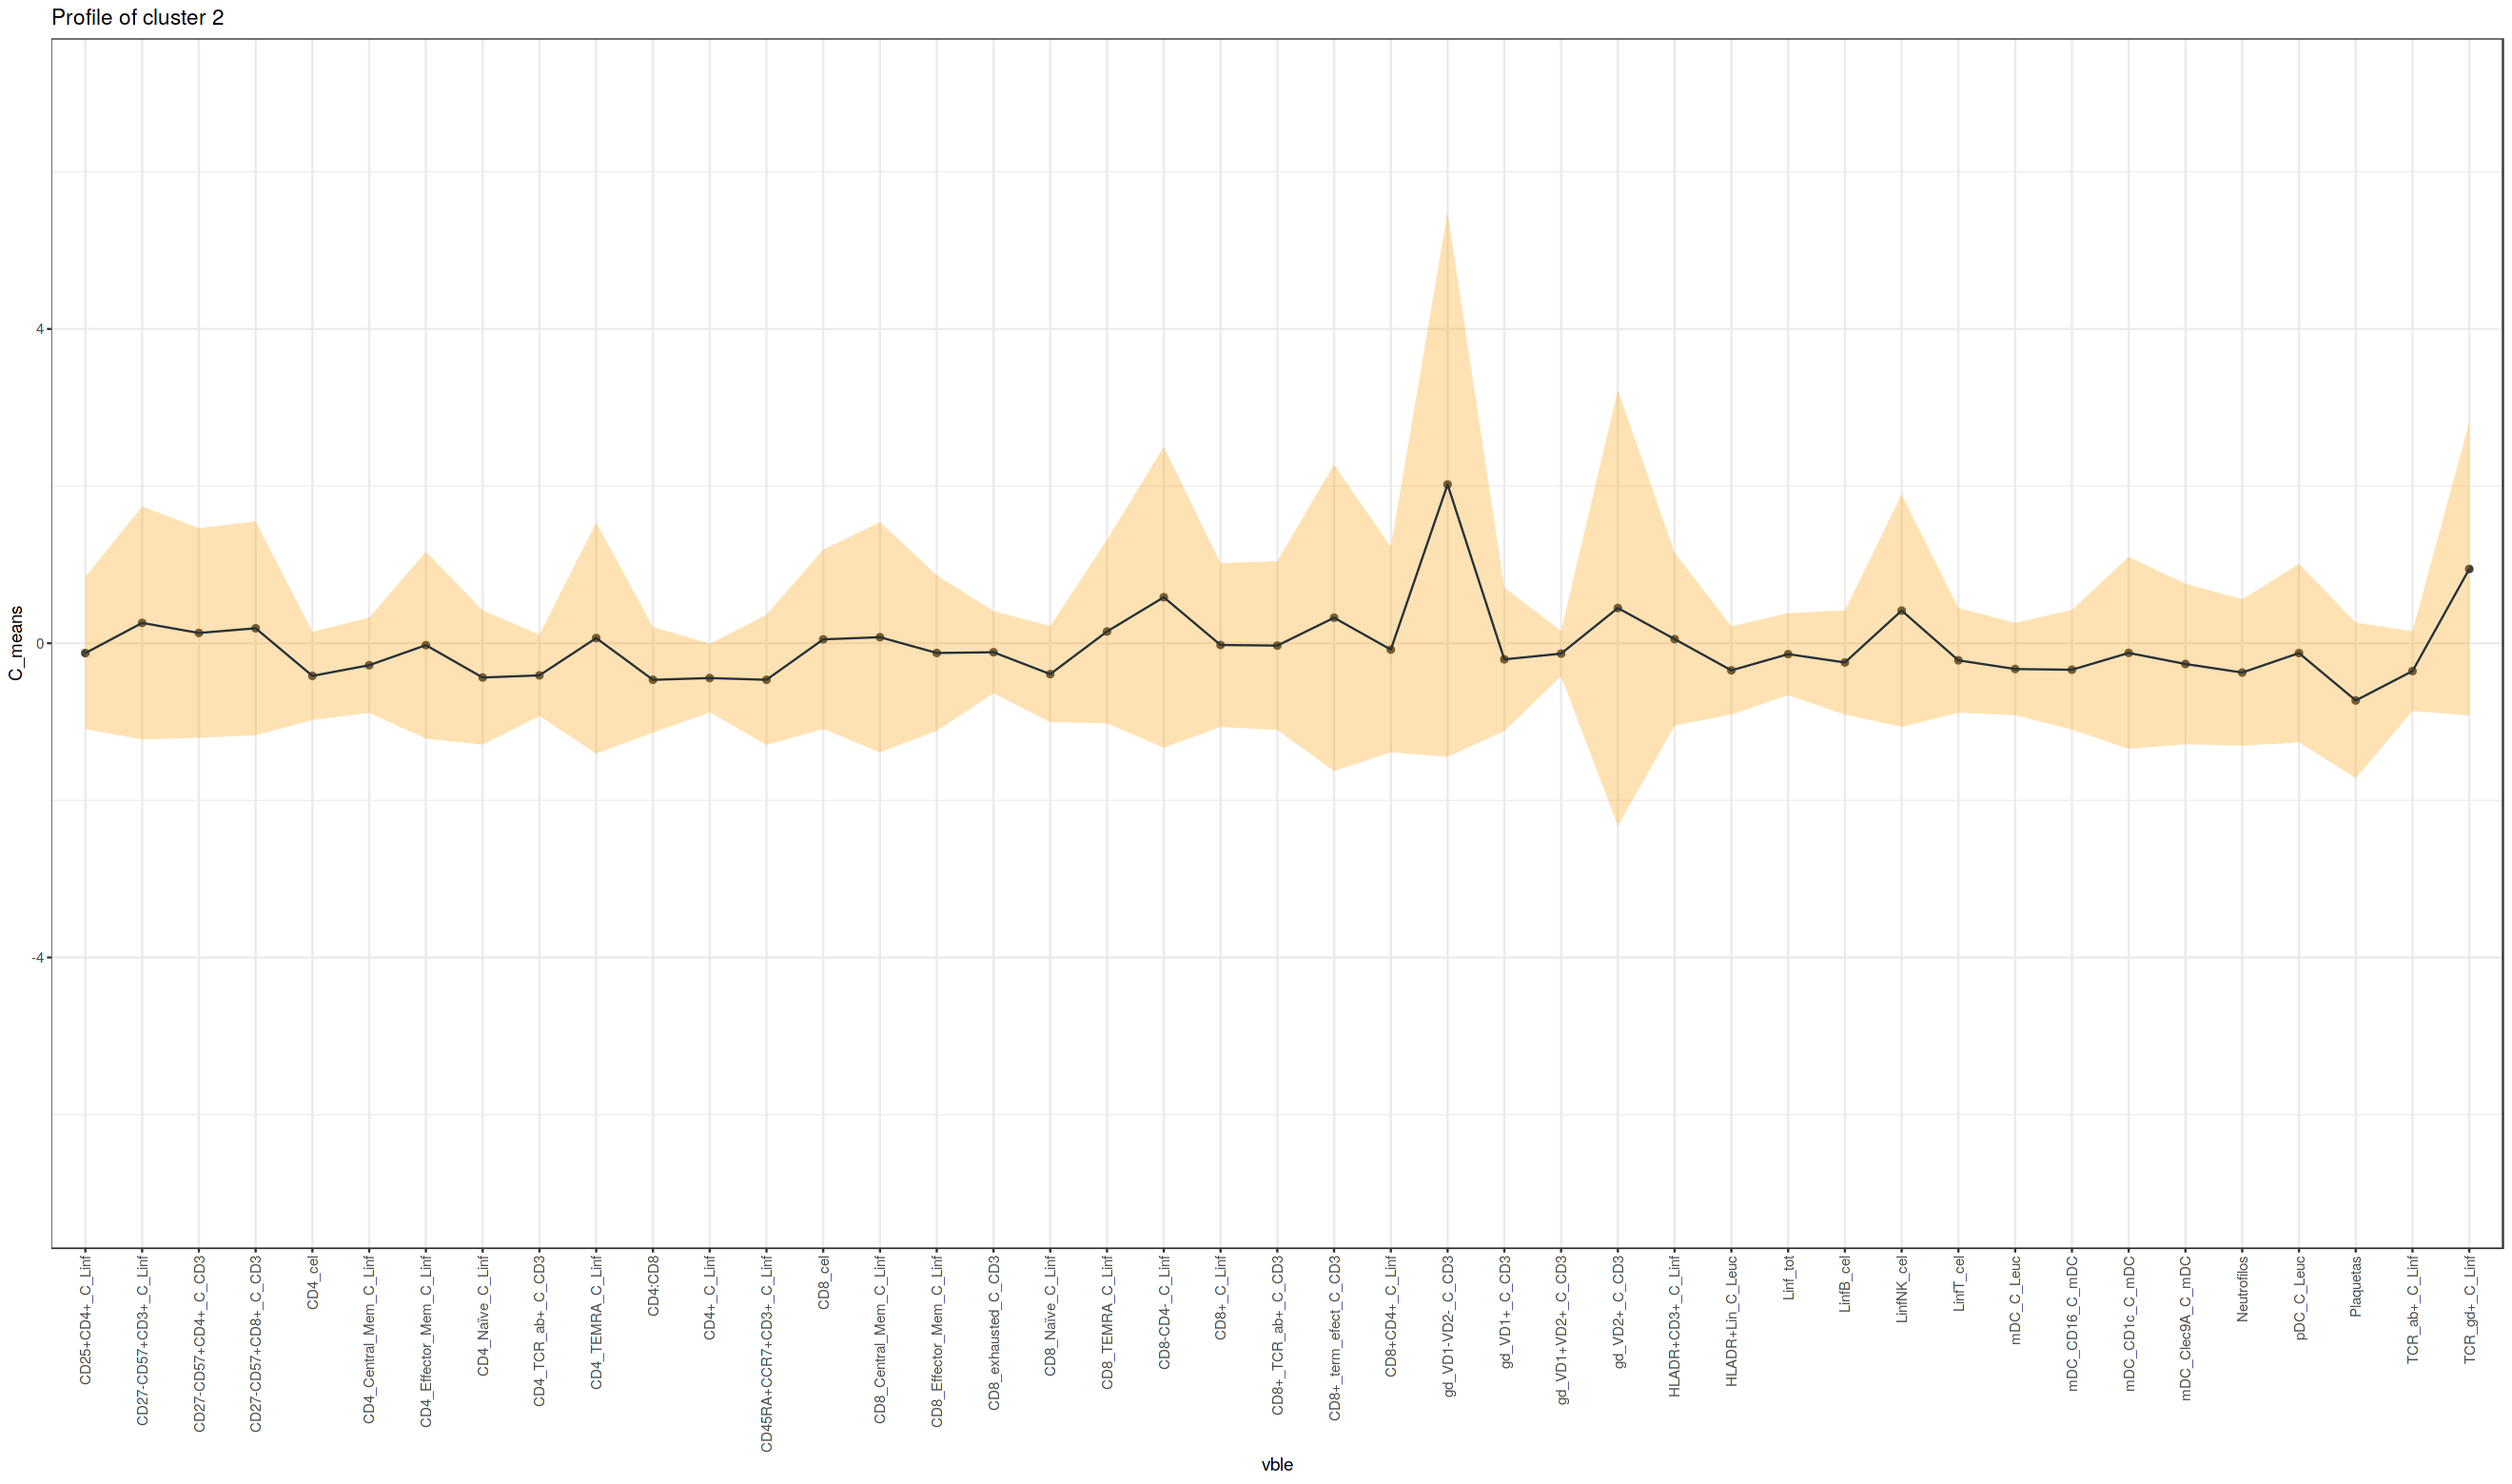

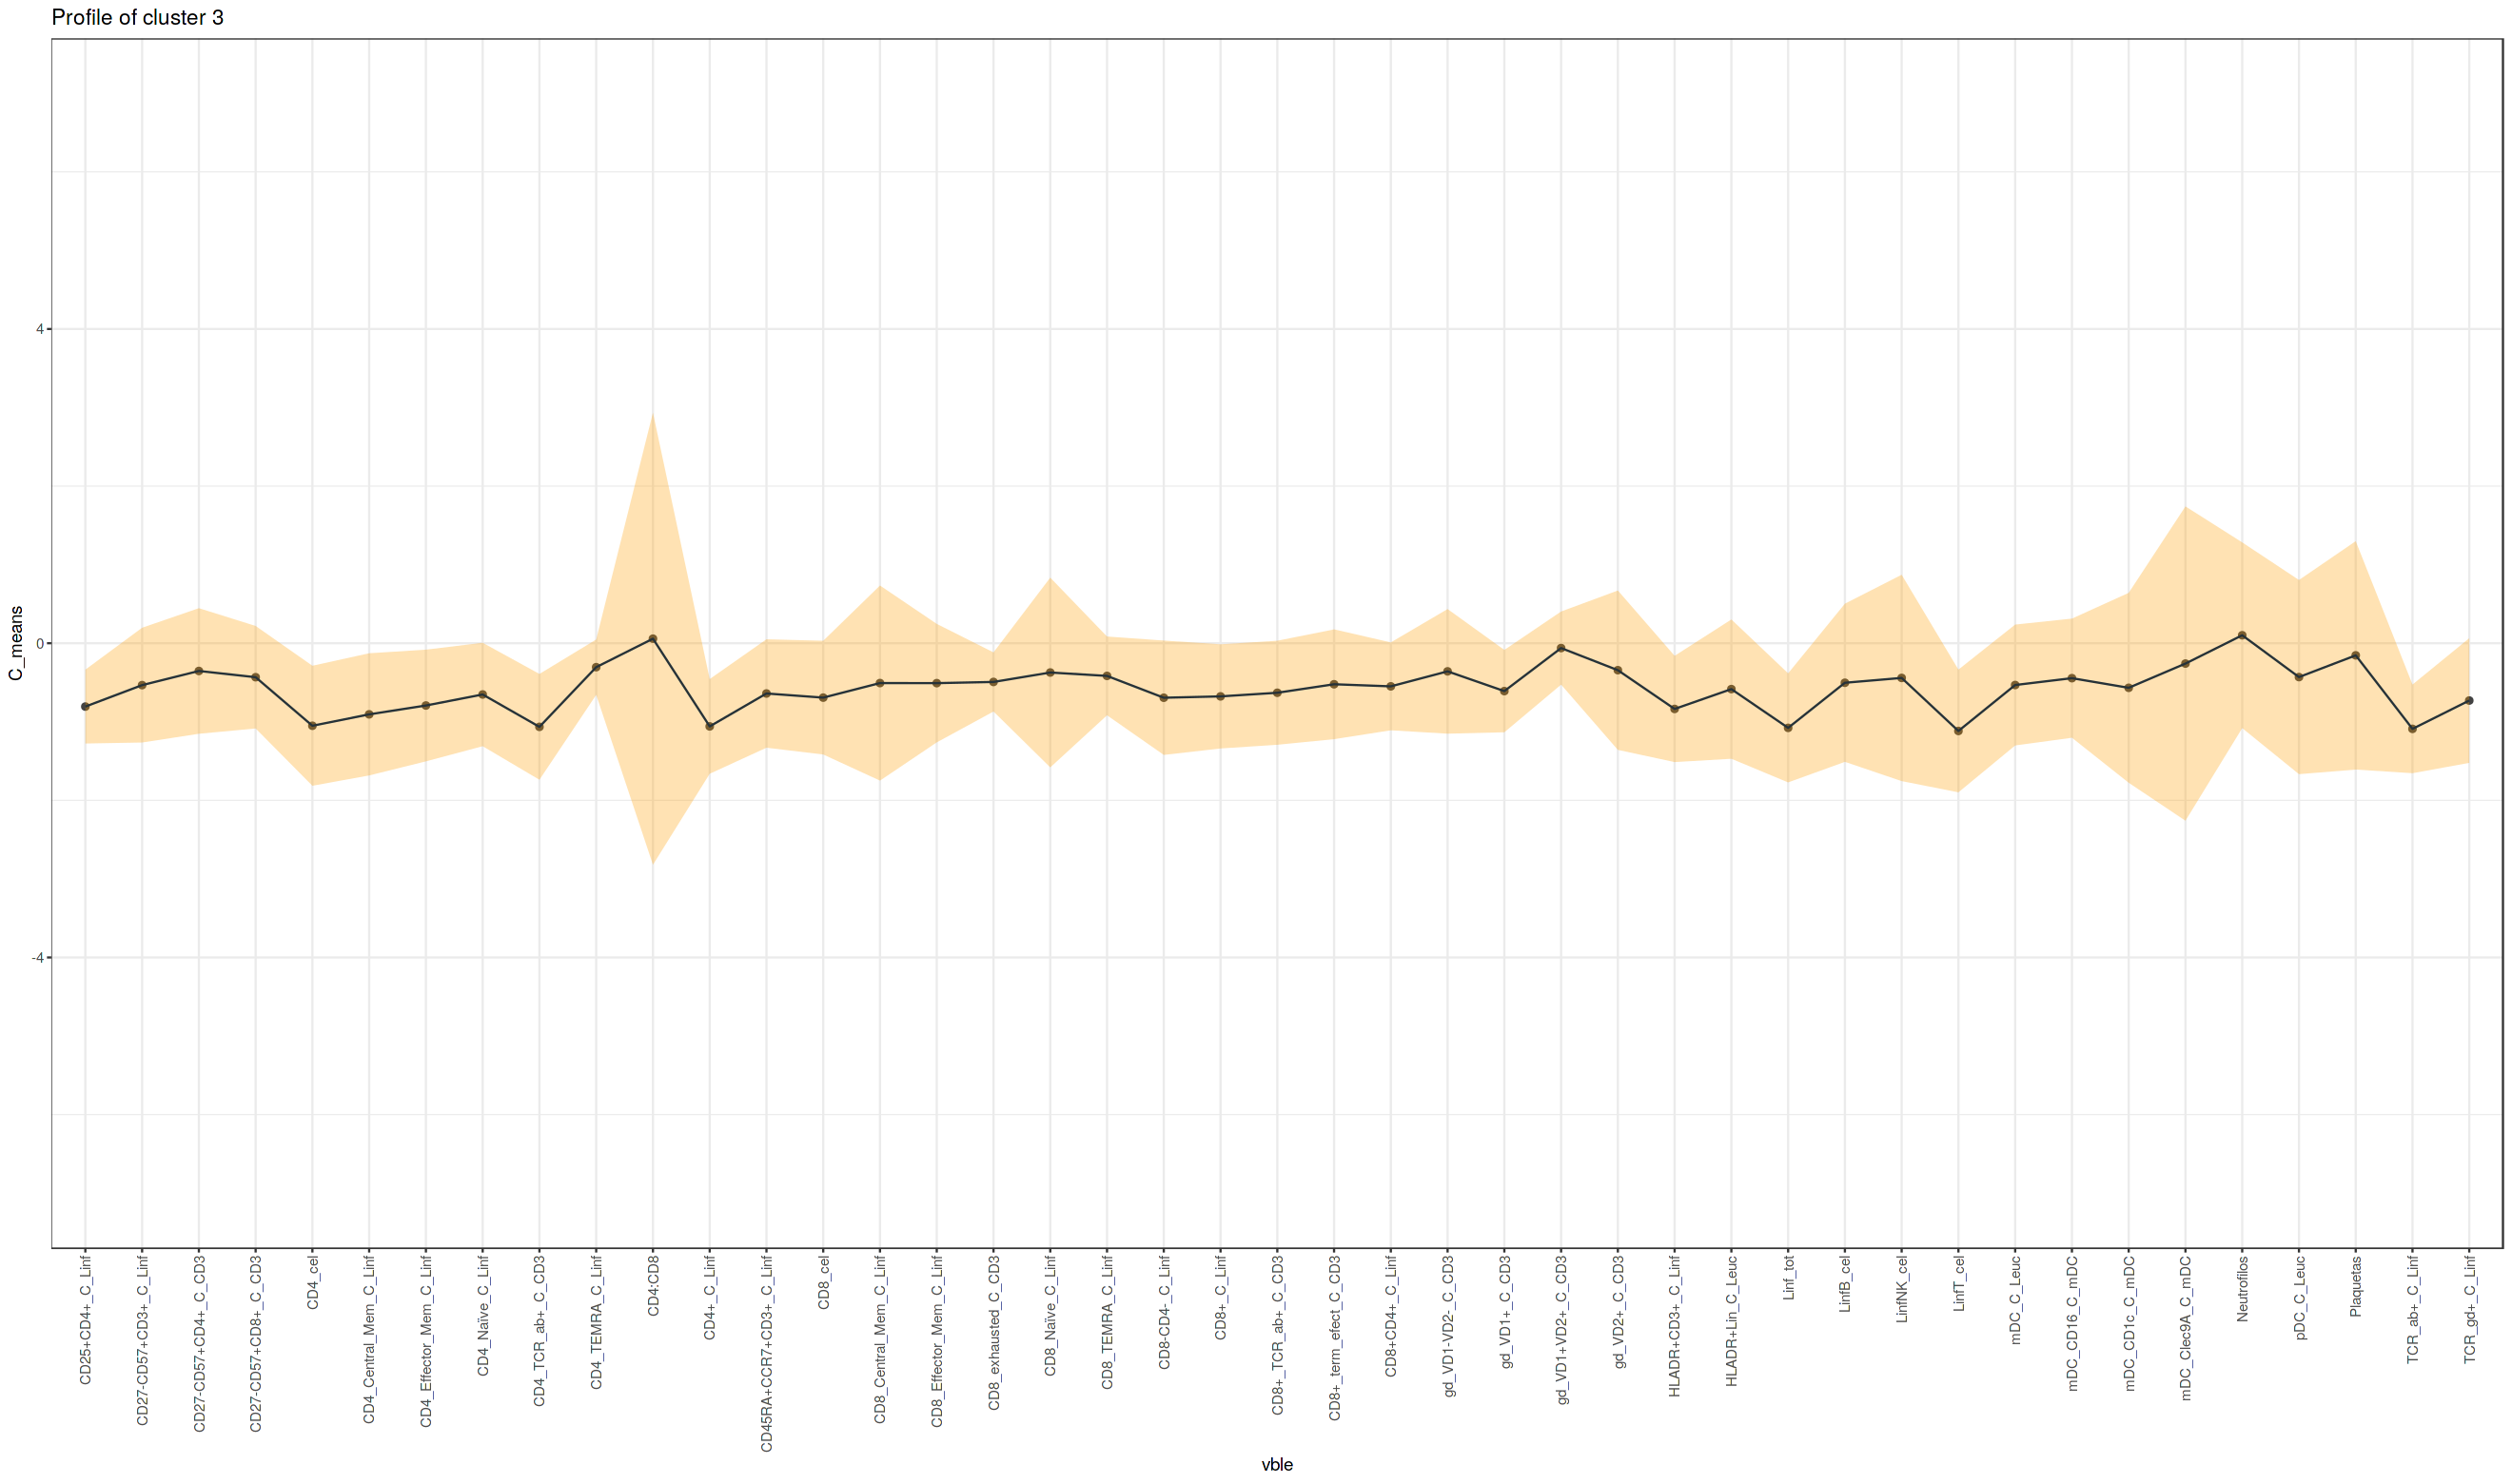

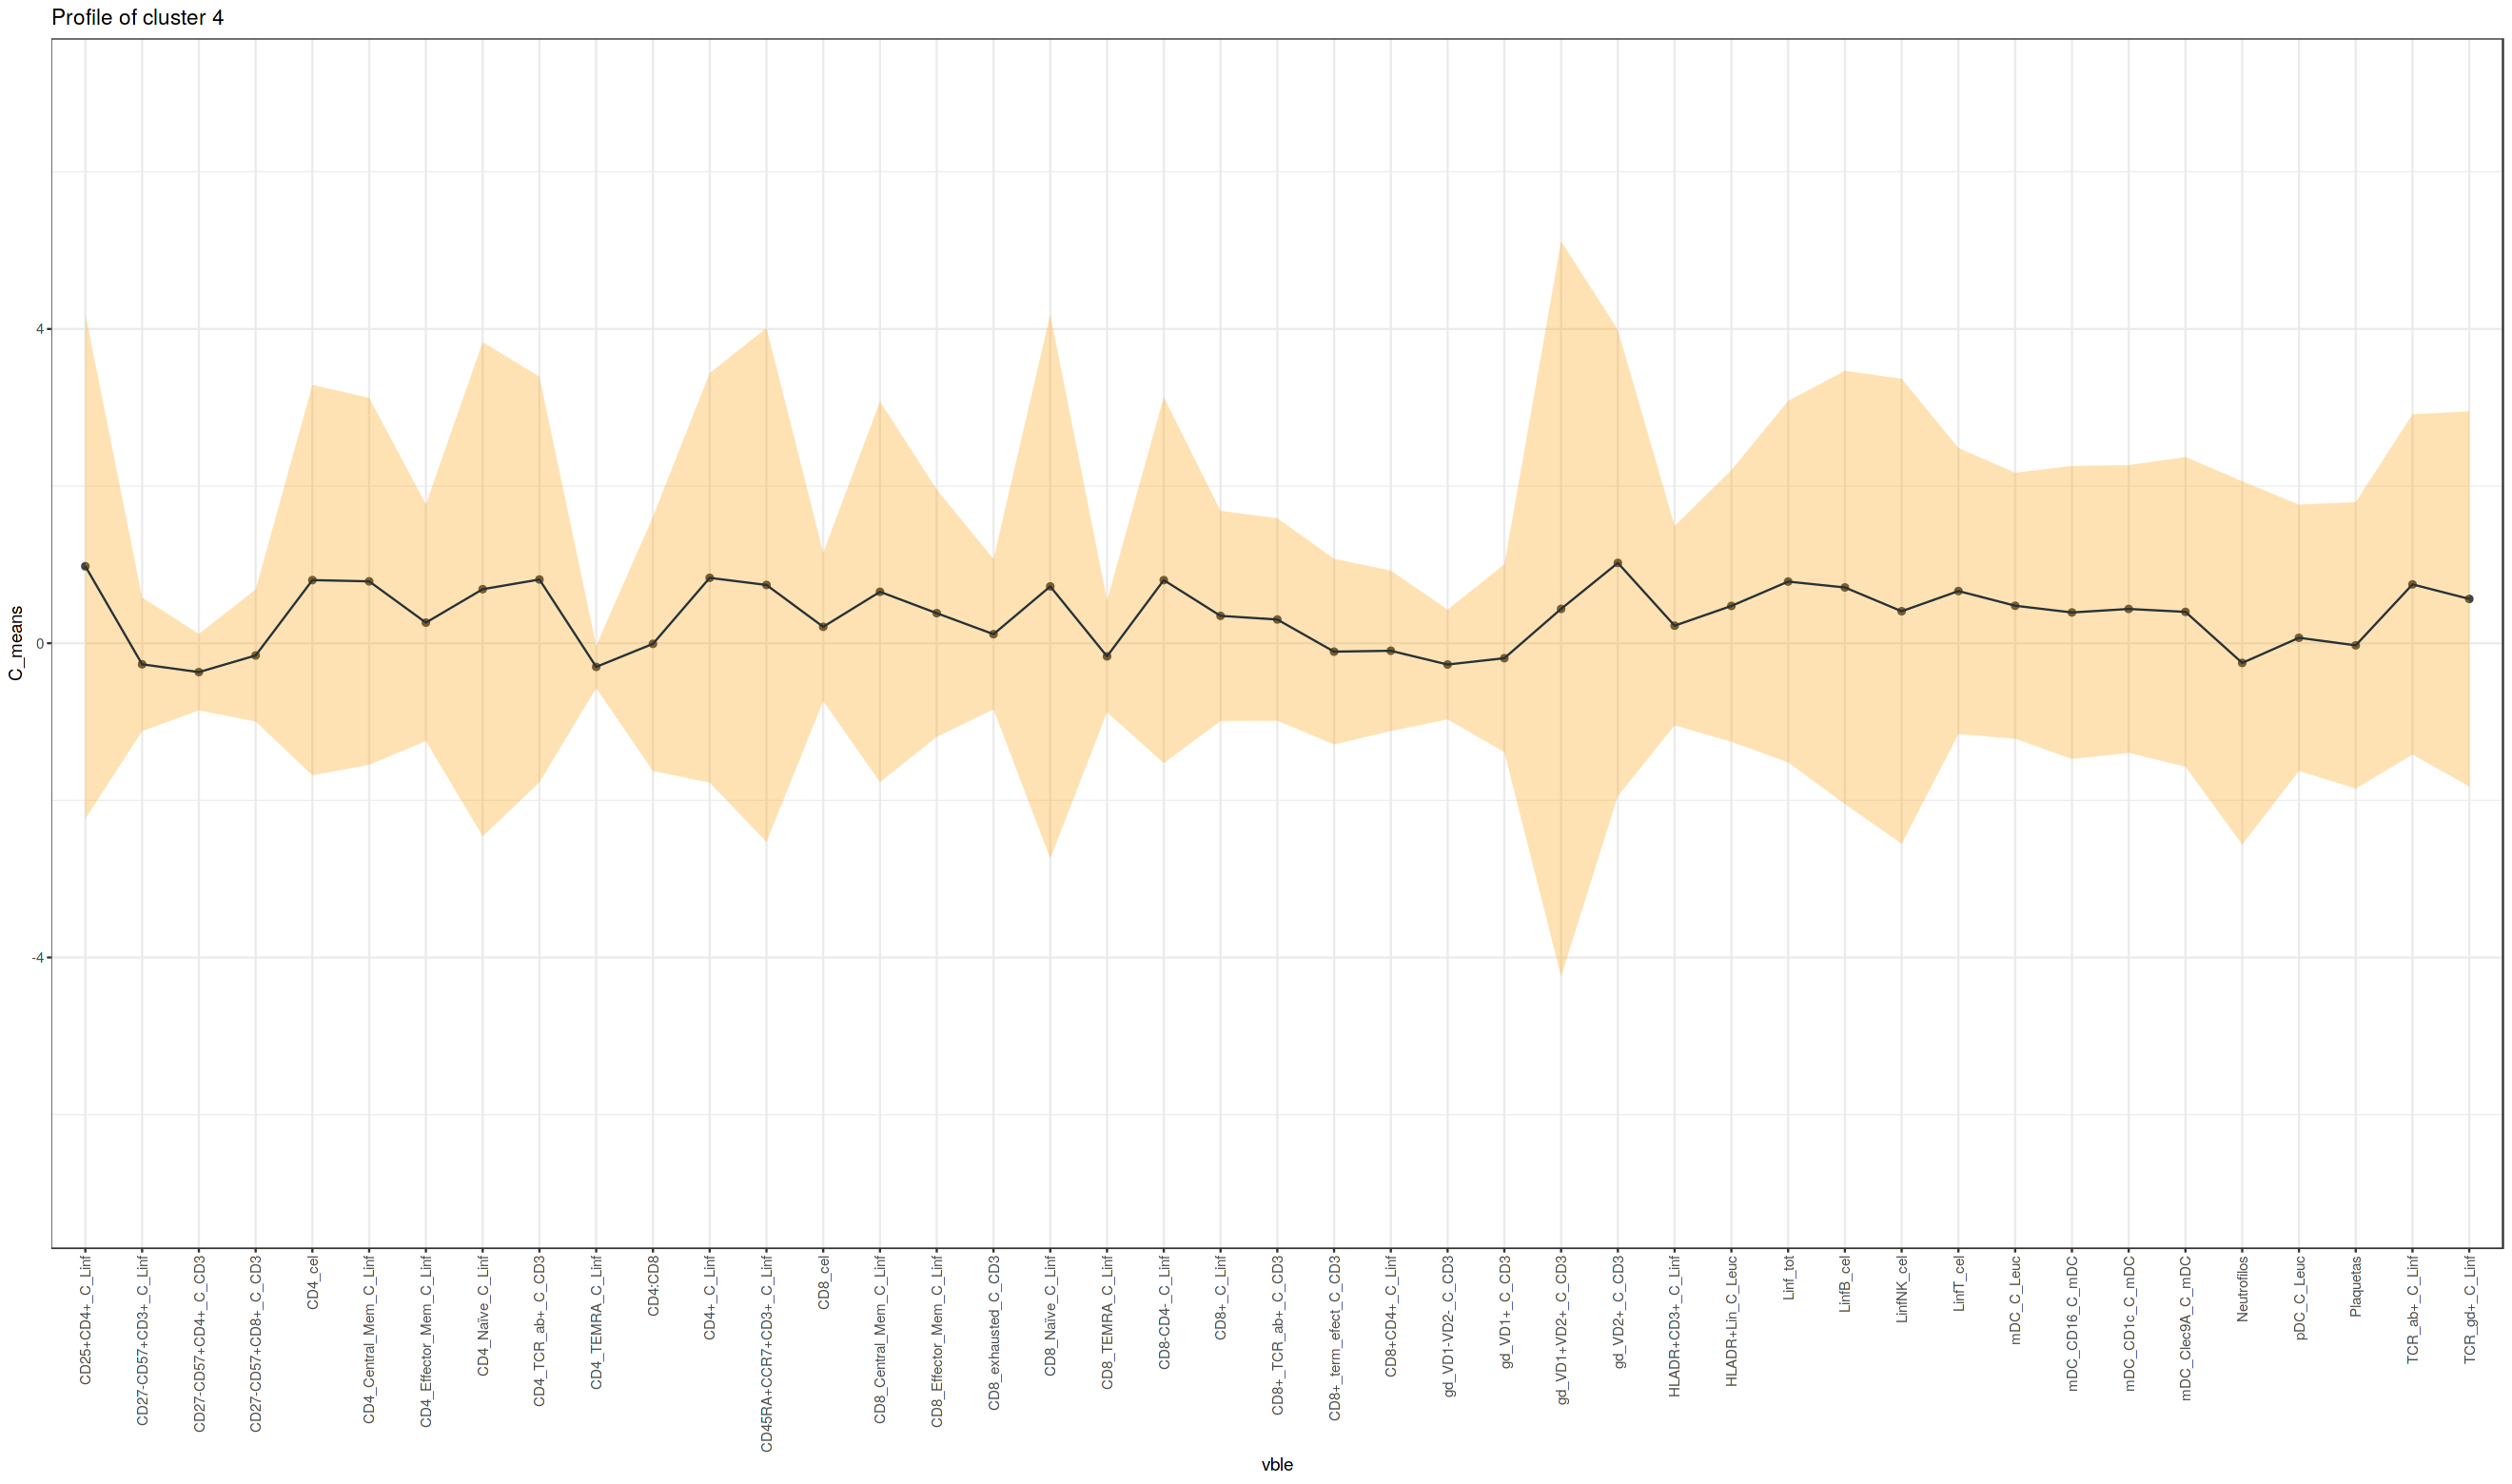

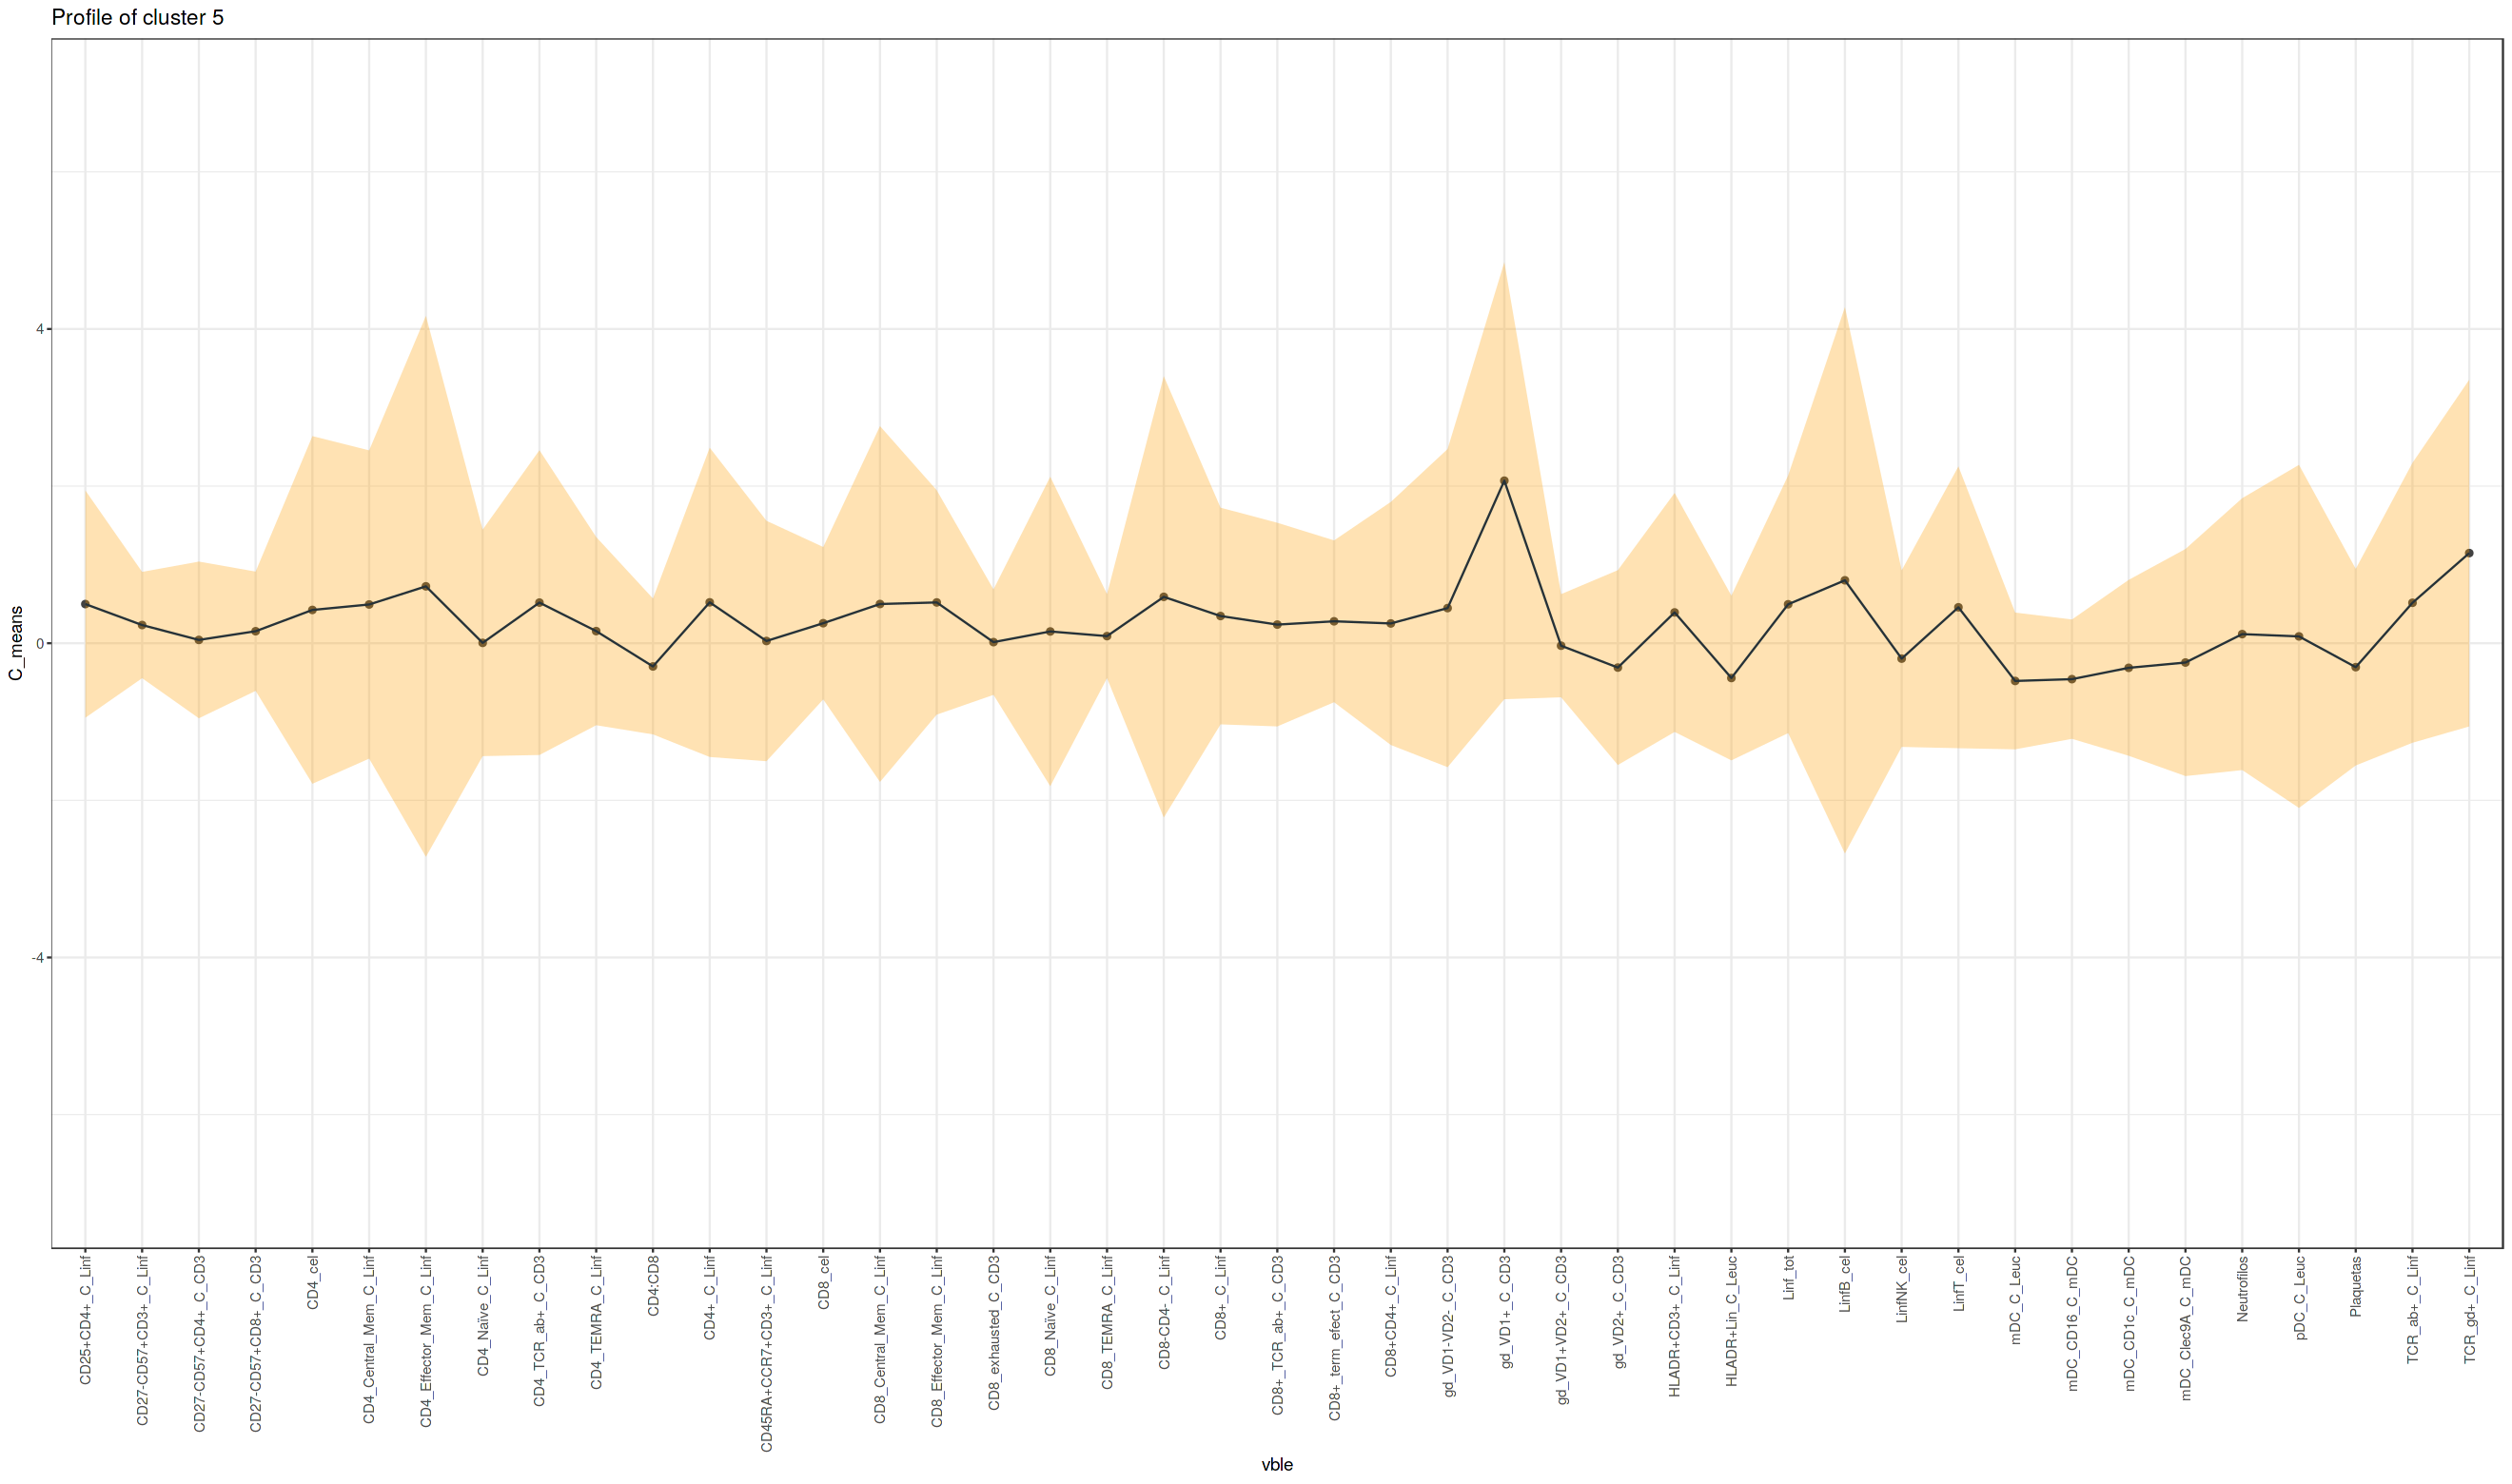

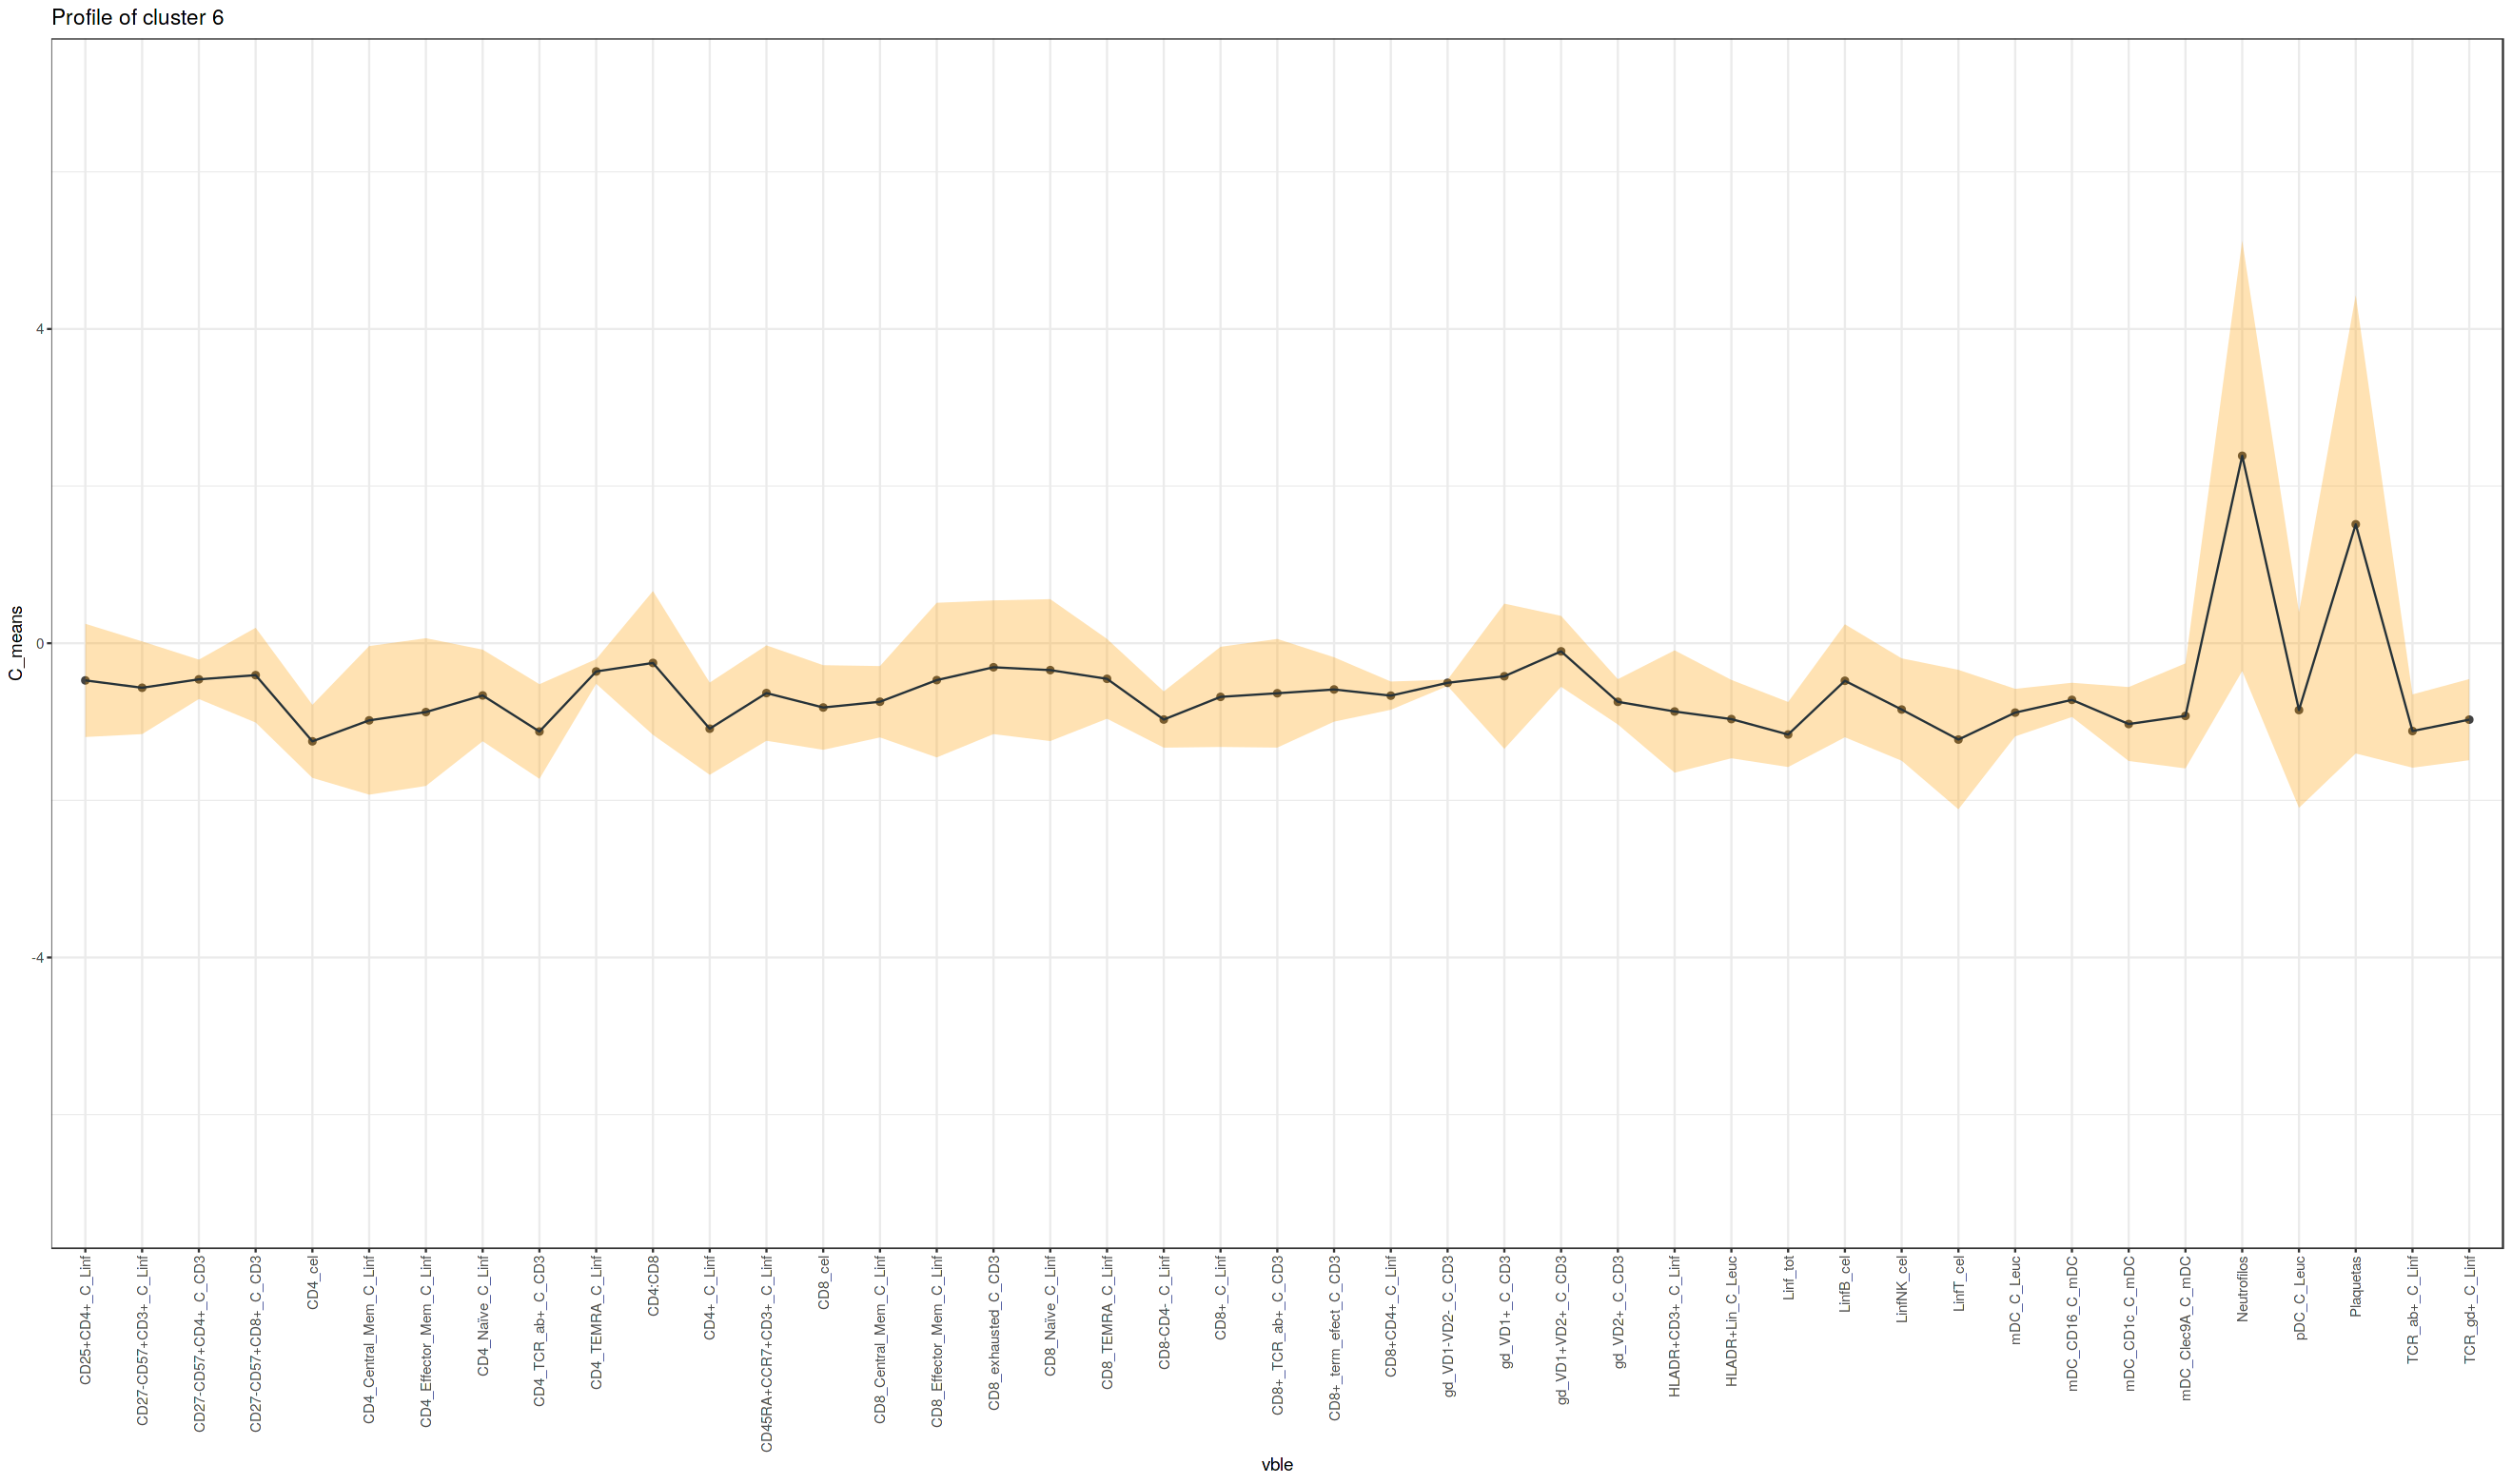

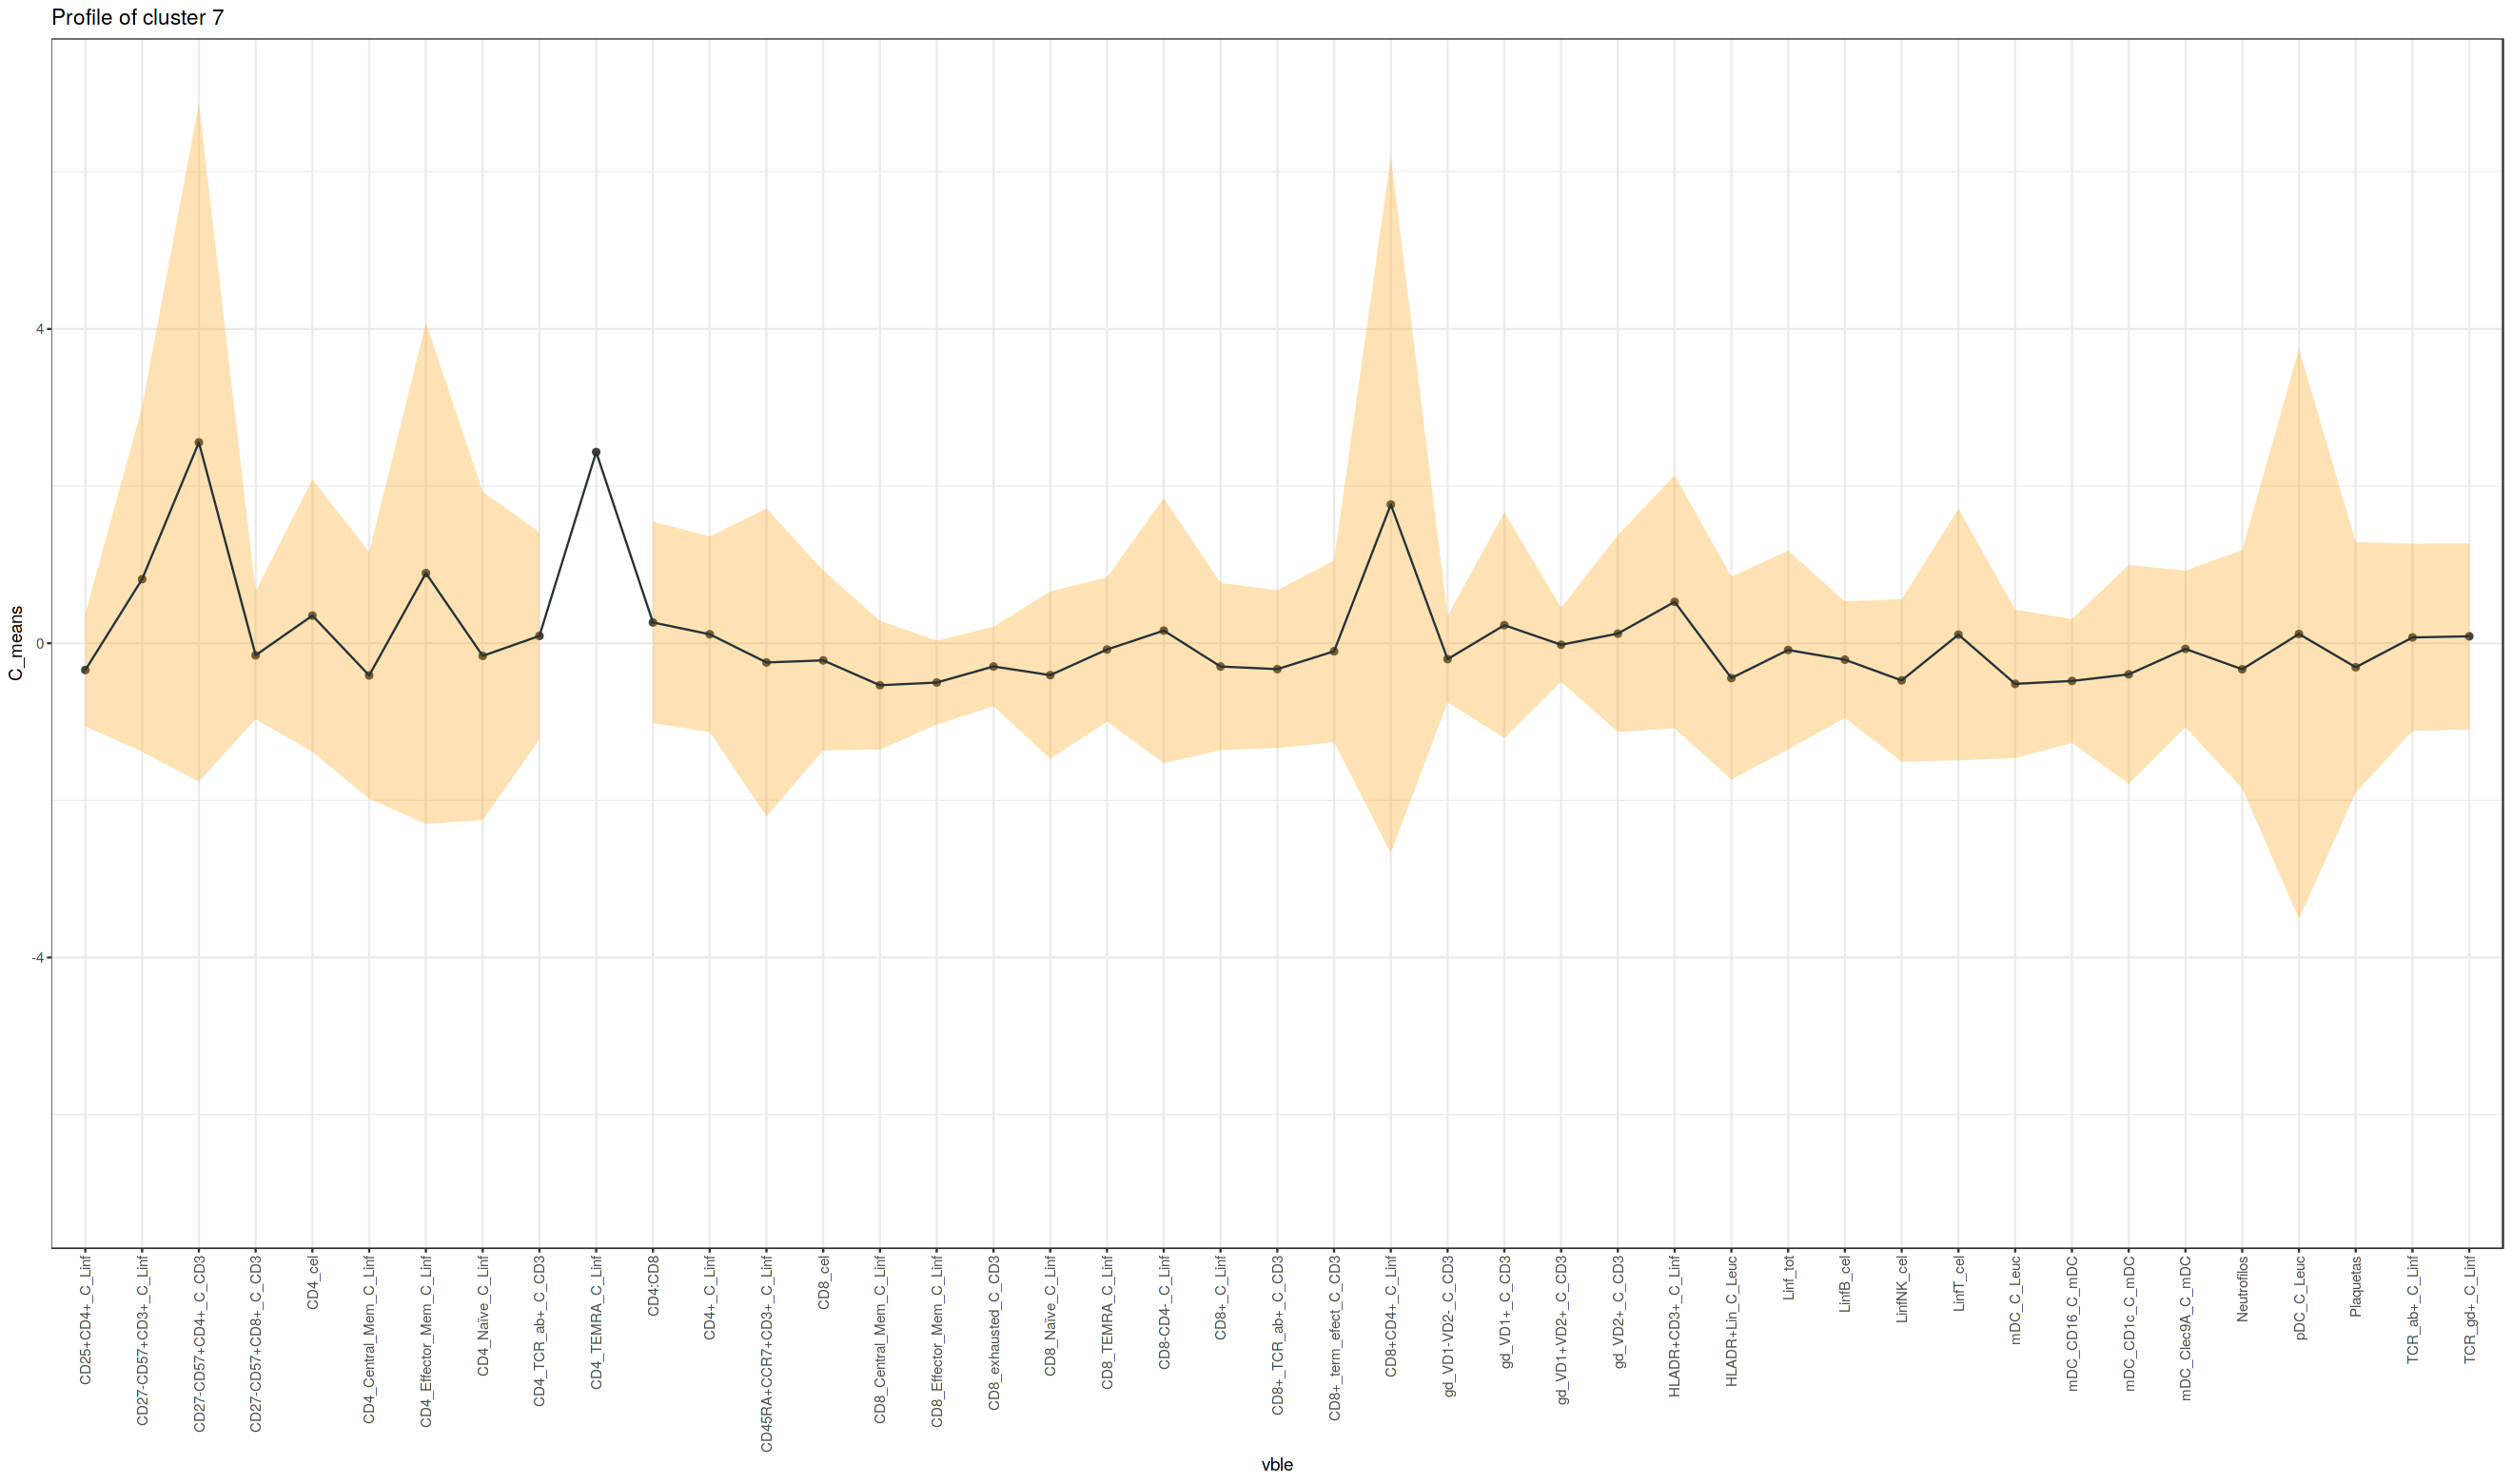

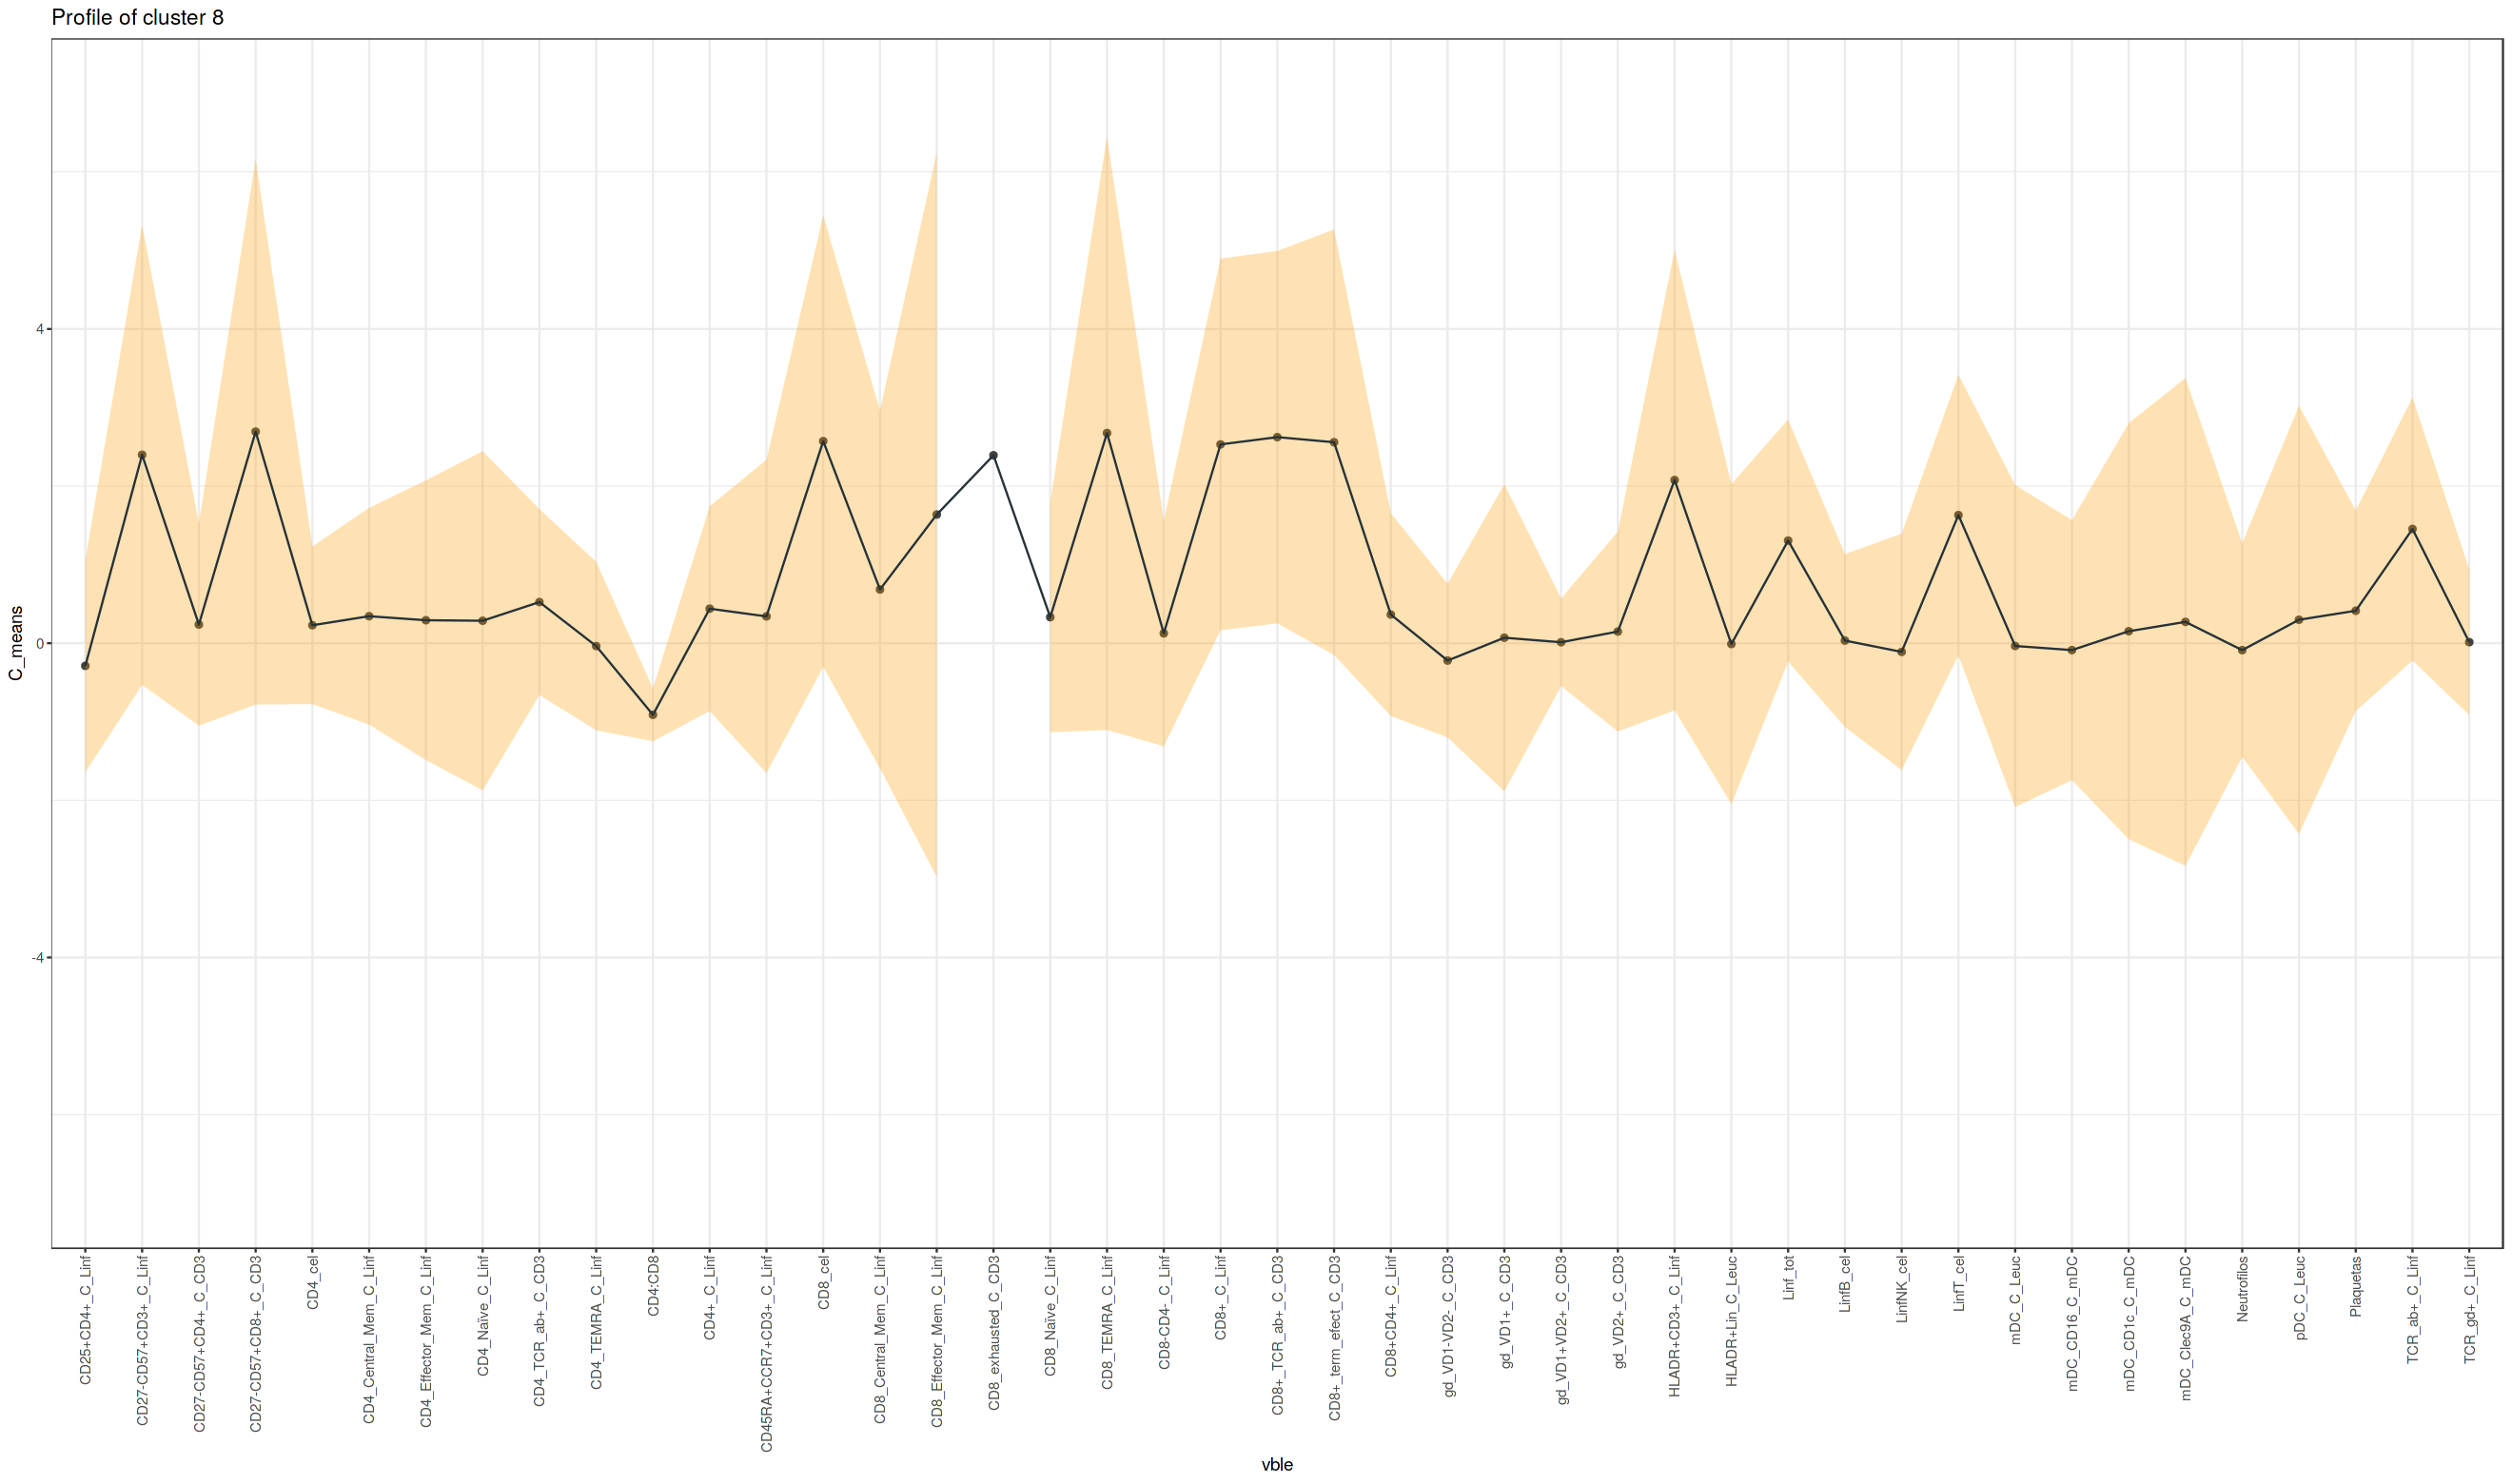

In [45]:
for (i in 0:8){
    options(repr.plot.width=22, repr.plot.height=13)
    g1 <- ggplot() + 
    geom_point(data = filter(df_stats_cluster, group == i), aes(x = vble, y = C_means, group = i), colour = '#424242') +
    geom_ribbon(data = filter(df_stats_cluster, group == i), aes(x = vble, ymin=ymin, ymax=ymax, group = i), linetype=2, alpha=0.3, fill = '#FFA000') + 
    geom_line(data = filter(df_stats_cluster, group == i), aes(x = vble, y = C_means, group = i), colour = '#263238') +
    ylim(-7, 7) + ggtitle(paste('Profile of cluster', i)) +
    theme_bw() + theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1)) 
    print(g1)
}

In [47]:
for (i in 0:8){
    options(repr.plot.width=22, repr.plot.height=8)
    g1 <- ggplot() + 
    geom_hline(yintercept=0, linetype="dashed", color = "red", size=0.5) +
    geom_point(data = filter(df_stats_cluster, group == i), aes(x = vble, y = C_means, group = i), colour = '#424242') +
    geom_line(data = filter(df_stats_cluster, group == i), aes(x = vble, y = C_means, group = i), colour = '#263238')  +
    ylim(-3, 6) + geom_ribbon(data = filter(df_stats_cluster, group == i), aes(x = vble, ymin=ymin, ymax=ymax, group = i), linetype=2, alpha=0.3, fill = '#FFA000') +
    ggtitle(paste('Profile of cluster', i)) + theme_bw() + theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1)) 
    ggsave(paste('profile_ind', i, '.png', sep = '', collapse = ''), height = 6, width = 13)
}